<a href="https://colab.research.google.com/github/abhiwavhal/BIKE-SHARING-DEMAND-PREDICTION/blob/main/Bike_Shearing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Seoul Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

#### **The Almabetter team assigned me a project with the objective of gaining insights into bike sharing systems.These systems involve automated processes for membership acquisition, bike rental, and bike return across a city. Through these systems, individuals can rent a bike from one location and return it to another.The dataset provided, known as "Seoul bike data," includes a column named "Rented bike count," which serves as our target variable, while the other columns are considered independent variables. Our goal is to utilize various machine learning techniques to predict the hourly count of rented bikes.**
#### **Upon reviewing the dataset, it appears that some preprocessing is necessary before we can use the data. However, it's worth noting that there are no missing or null values in the dataset.In the next step, we need to perform Exploratory Data Analysis (EDA). During this process, I noticed that the "hour" column, although initially considered numerical, should be treated as a categorical feature. This adjustment is crucial because, when left as numerical, it didn't yield accurate results in subsequent analyses.**
#### **Additionally, we need to address multicollinearity in the dataset. Specifically, the columns "temperature" and "dew point temperature" exhibit a high degree of correlation. To mitigate this issue and avoid affecting the model's outcome, we should consider removing one of these columns.**
#### **The dataset has been divided into a training set and a testing set to enhance model accuracy. I have established evaluation metrics, including Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Scaled Error (MASE), R-Squared, Adjusted R-Squared, Best-params, and Best-score, to assess the performance of different models.**
#### **Although Linear Regression was initially employed as a baseline model, it was recognized that this approach may not be suitable. As a result, other models were fitted as reference points to gauge their performance.**
#### **To mitigate overfitting and achieve optimal outcomes, regularization techniques like Lasso and Ridge regression were employed. Multiple Linear Regression was also applied, yielding improved results.**





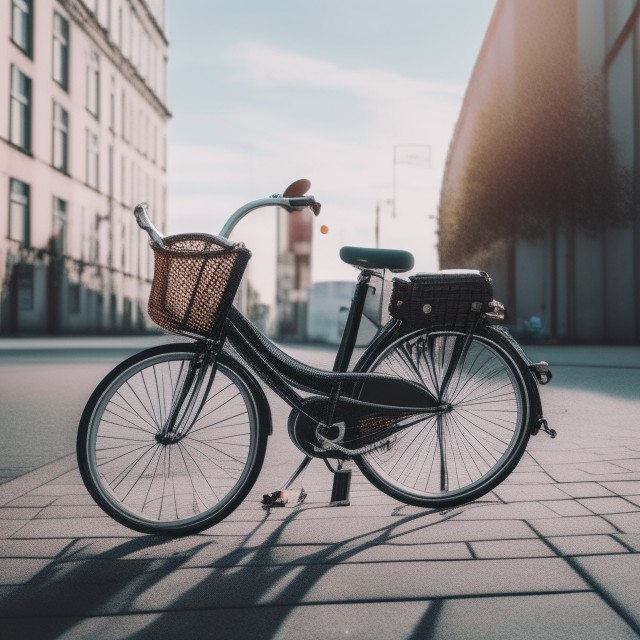

# **GitHub Link -**

https://github.com/abhiwavhal/BIKE_SHARING_DEMAND_PREDICTION/blob/main/Bike_Shearing_Demand_Prediction.ipynb

# **Problem Statement**


#### **In many urban cities, rental bikes have been introduced to enhance mobility comfort, and ensuring their availability and accessibility is crucial to reduce waiting times.**
#### **The challenge lies in maintaining a stable supply of rental bikes, making accurate hourly predictions for bike demand essential.**
#### **Seoul, South Korea's bike-sharing program faces low utilization rates and resource inefficiencies.my project's goal is to develop a precise predictive model that forecasts bike rental demand by leveraging historical usage patterns, weather data, and relevant factors.**
#### **By doing so, we aim to help optimize the bike-sharing program, enhancing user satisfaction while reducing operational costs.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [160]:
# Importing required Libraries
import pandas as pd
import numpy as np
from datetime import datetime as dt

# Import Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Perform Statistical Test to obtain P-Value
from scipy.stats import shapiro

# Import preporcessing libraries
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# Import model selection libraries
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

# Import Outlier influence library
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import Model
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
# from xgboost import XGBRegressor
# import xgboost as xgb

# Import evaluation metric libraries
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# Import tree for visualization
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG,display
from graphviz import Source

### Dataset Loading

In [89]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [161]:
# Load Dataset
seol_bike_df=pd.read_csv('/content/drive/MyDrive/Almas Better/Regression Capstone Project/SeoulBikeData.csv',encoding='latin')

### Dataset First View

In [162]:
# Dataset First Look
# Checking the top 5 rows od the dataset
seol_bike_df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [92]:
# Checking the bottom 5 rows of the dataset
seol_bike_df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

### Dataset Rows & Columns count

In [93]:
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",seol_bike_df.shape[0])
print("Number of columns are: ",seol_bike_df.shape[1])

Number of rows are:  8760
Number of columns are:  14


In [94]:
# Checking all the columns name
seol_bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

#### For the information above, we can see that there are 8760 rows and 14 columns.

### Dataset Information

In [95]:
# Dataset Info
seol_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [96]:
# Checking duplicated rows count
duplicates_from_dataset=seol_bike_df.duplicated().sum()
print(f'There are {duplicates_from_dataset} duplicate values in dataset.')

There are 0 duplicate values in dataset.


#### Missing Values/Null Values

In [97]:
# Checking missing values/null values count for each column
seol_bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [98]:
# Visualizing the missing values
# Dataset Duplicate Value Count
duplicate_values = seol_bike_df.duplicated().value_counts()
duplicate_values


False    8760
dtype: int64

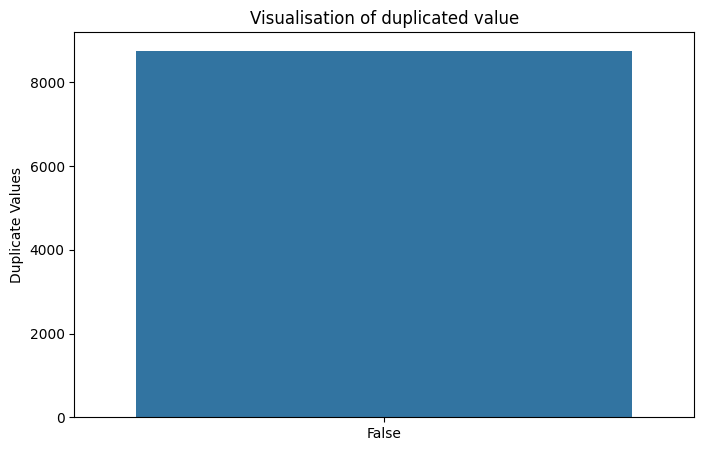

In [99]:
# Visualizing the duplicate values
plt.figure(figsize=(8,5))
#assigning the fig size to this countplot
#For better Well-structured and code formatted we will use (8,5) fig size to evry chart

sns.countplot(x=seol_bike_df.duplicated())
plt.title('Visualisation of duplicated value')
plt.ylabel('Duplicate Values')
plt.show()

### What did you know about your dataset?




1.   #### There are a total of 14 feature columns where Rented_Bike_Count is the dependent variable column.
2.   #### The total number of observations(rows) are 8760.
3. #### There are no duplicate rows in the dataset.
4. #### Also there are no missing values or Null values in the dataset.
5. #### Date- columns need to convert into proper data type.
6. #### Columns to convert into numeric(for modelling Purpose)
seasons
holiday
functioning day











## ***2. Understanding Your Variables***

In [100]:
# Dataset Columns
# Checking all the columns name
seol_bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [101]:
# Dataset Describe
seol_bike_df.describe(include='all')

Date  Rented Bike Count         Hour  Temperature(°C)  \
count         8760        8760.000000  8760.000000      8760.000000   
unique         365                NaN          NaN              NaN   
top     01/12/2017                NaN          NaN              NaN   
freq            24                NaN          NaN              NaN   
mean           NaN         704.602055    11.500000        12.882922   
std            NaN         644.997468     6.922582        11.944825   
min            NaN           0.000000     0.000000       -17.800000   
25%            NaN         191.000000     5.750000         3.500000   
50%            NaN         504.500000    11.500000        13.700000   
75%            NaN        1065.250000    17.250000        22.500000   
max            NaN        3556.000000    23.000000        39.400000   

        Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
count   8760.000000       8760.000000       8760.000000   
unique          NaN               NaN               NaN   
top             NaN               NaN               NaN   
freq            NaN               NaN               NaN   
mean      58.226256          1.724909       1436.825799   
std       20.362413          1.036300        608.298712   
min        0.000000          0.000000         27.000000   
25%       42.000000          0.900000        940.000000   
50%       57.000000          1.500000       1698.000000   
75%       74.000000          2.300000       2000.000000   
max       98.000000          7.400000       2000.000000   

        Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
count                 8760.000000              8760.000000   8760.000000   
unique                        NaN                      NaN           NaN   
top                           NaN                      NaN           NaN   
freq                          NaN                      NaN           NaN   
mean                     4.073813                 0.569111      0.148687   
std                     13.060369                 0.868746      1.128193   
min                    -30.600000                 0.000000      0.000000   
25%                     -4.700000                 0.000000      0.000000   
50%                      5.100000                 0.010000      0.000000   
75%                     14.800000                 0.930000      0.000000   
max                     27.200000                 3.520000     35.000000   

        Snowfall (cm) Seasons     Holiday Functioning Day  
count     8760.000000    8760        8760            8760  
unique            NaN       4           2               2  
top               NaN  Spring  No Holiday             Yes  
freq              NaN    2208        8328            8465  
mean         0.075068     NaN         NaN             NaN  
std          0.436746     NaN         NaN             NaN  
min          0.000000     NaN         NaN             NaN  
25%          0.000000     NaN         NaN             NaN  
50%          0.000000     NaN         NaN             NaN  
75%          0.000000     NaN         NaN             NaN  
max          8.800000     NaN         NaN             NaN

### Variables Description

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


<b>Attribute Information: </b>

* Date : year-month-day
* Rented Bike count - Count of bikes rented at each hour
* Hour - Hour of the day
* Temperature-Temperature in Celsius
* Humidity - %
* Windspeed - m/s
* Visibility - 10m
* Dew point temperature - Celsius
* Solar radiation - MJ/m2
* Rainfall - mm
* Snowfall - cm
* Seasons - Winter, Spring, Summer, Autumn
* Holiday - Holiday/No holiday
* Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

### Check Unique Values for each variable.

In [102]:
# Check Unique Values for each variable.
seol_bike_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [103]:
# Before doing any data wrangling lets create copy of the dataset
data= seol_bike_df.copy()

In [104]:
# We can see that the Date variable is in object datatype, we need to change it into datetime datatype
data['Date'] = data['Date'].astype(np.datetime64)

data['month'] = data['Date'].dt.month

data['day'] = data['Date'].dt.day_name()

In [105]:
# Dropping Date variable from dataset
data.drop(['Date'],axis = 1, inplace = True)

In [106]:
# Defining separate data as numerical and categorical data.
# Numerical data

numerical_data = list(set(data.describe().columns.tolist()) - {'Hour','month'})

# Categorical data

categorical_data = list(set(data.columns)-set(numerical_data))

#dependent variable Data
dependent_variable = ['Rented Bike Count']


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  month                      8760 non-null   int64

In [108]:
data.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  month  \
0           0.0            0.0  Winter  No Holiday             Yes      1   
1           0.0            0.0  Winter  No Holiday             Yes      1   
2           0.0            0.0  Winter  No Holiday             Yes      1   
3           0.0            0.0  Winter  No Holiday             Yes      1   
4           0.0            0.0  Winter  No Holiday             Yes      1   

        day  
0  Thursday  
1  Thursday  
2  Thursday  
3  Thursday  
4  Thursday

### What all manipulations have you done and insights you found?

1) Changed Date column datatype from object to Datetime data type.

2) Created new columns Day and Month from date column and dropped Date.

3) Defining separate data as numerical and categorical data.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1
## Visualizing data distribution of Dependent variable (Rented Bike Count)

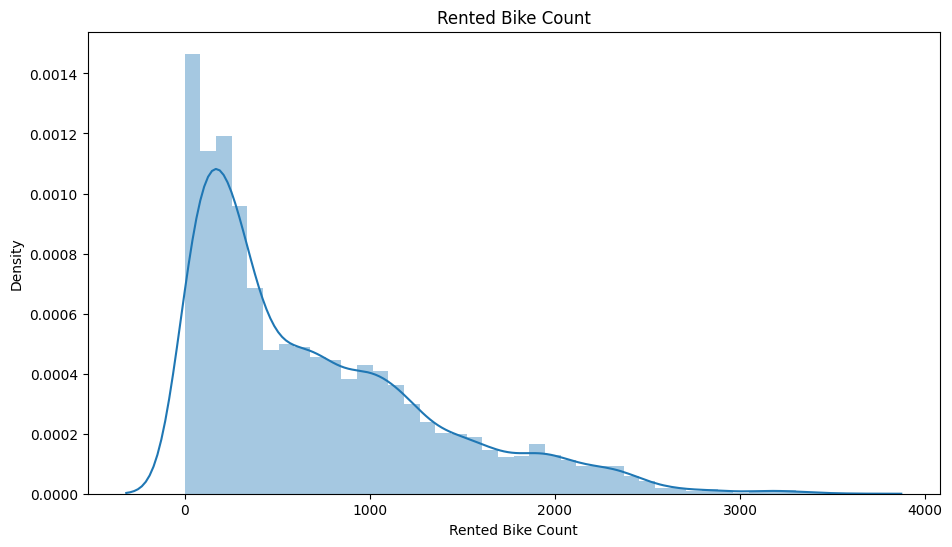

In [109]:
# Chart - 1 visualization code
# Chart - 1 visualization code

import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(11,6))
plt.title('Rented Bike Count')
sns.distplot(data['Rented Bike Count'] )
plt.show()

##### 1. Why did you pick the specific chart?

**Distplot is one of the best charts to show the data distribution.**

##### 2. What is/are the insight(s) found from the chart?

**From above distribution plot of dependent variable rented bike, we can clearly see that the distribution is positively skewed (Right skewed).It means that distribution is not symmetric around the the mean.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, definately from this insight we got to know that our data is not normally distributed so, before doing or implementing any model on this data we need to normalise this data.**

#### Chart - 2
## Visualizing data distribution of categorical data with respect to Rented Bike Count.

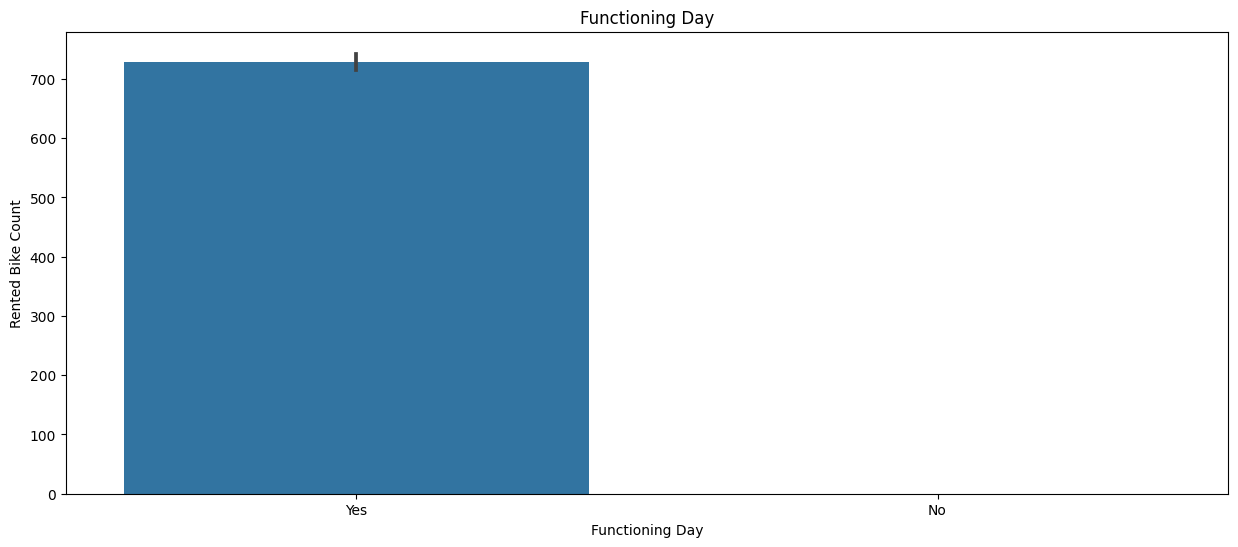

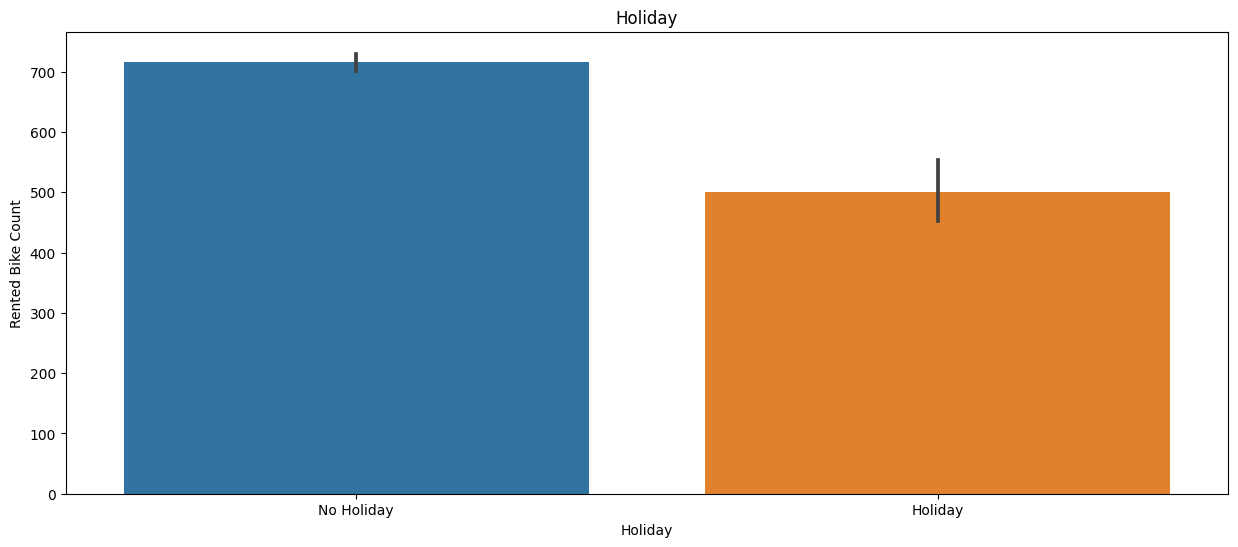

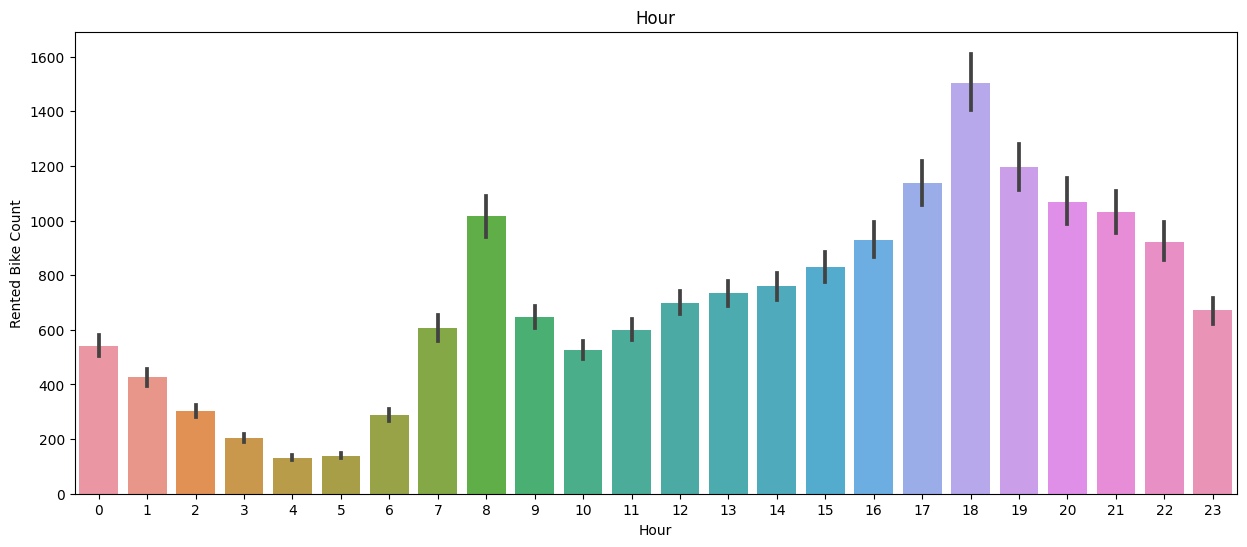

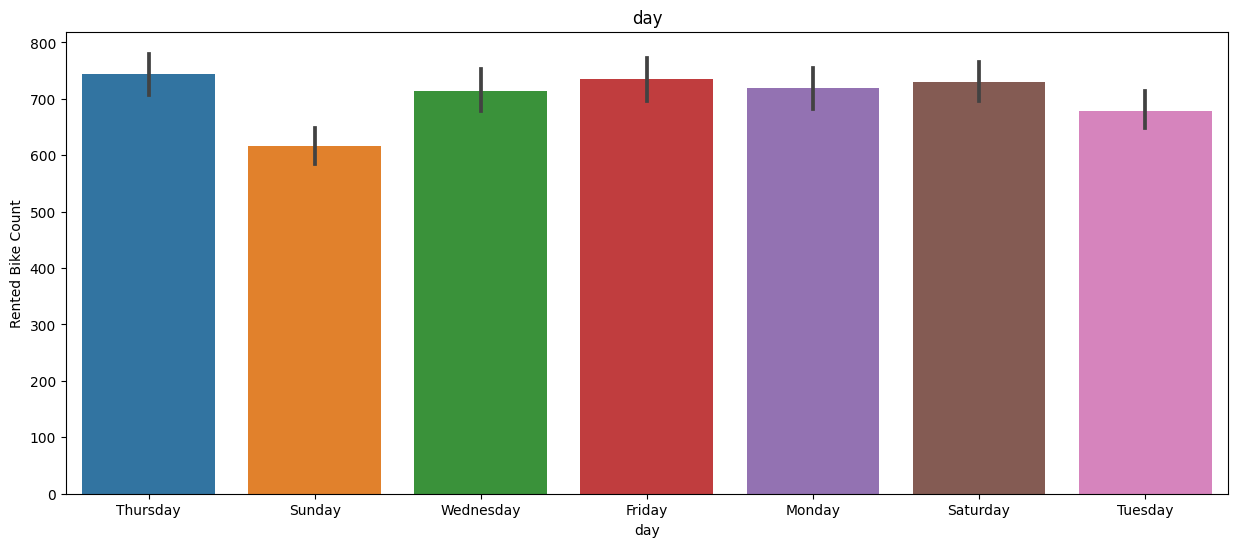

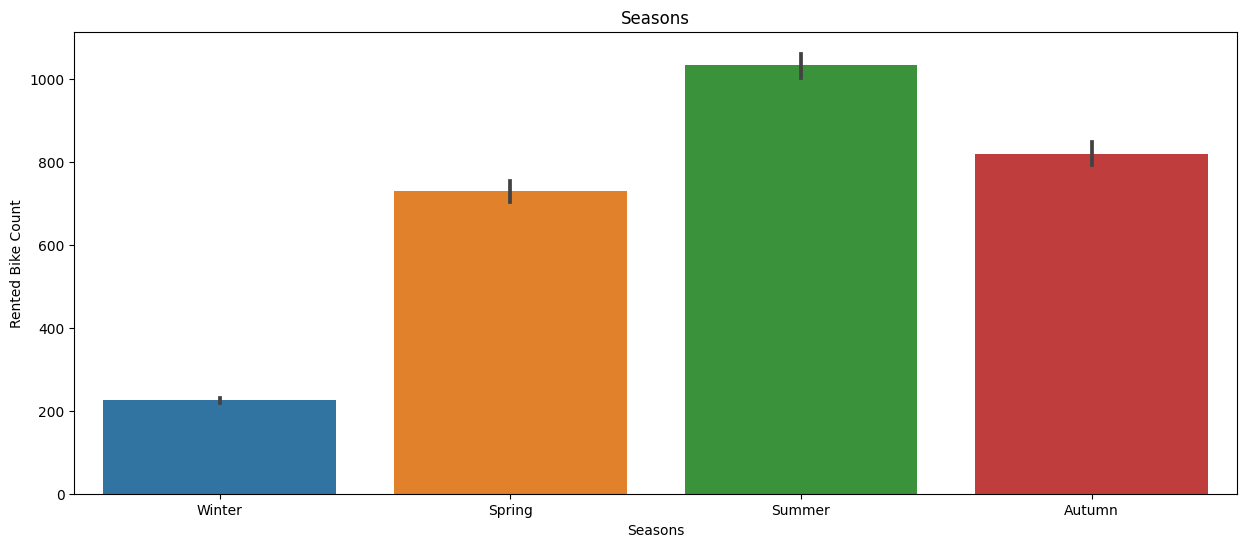

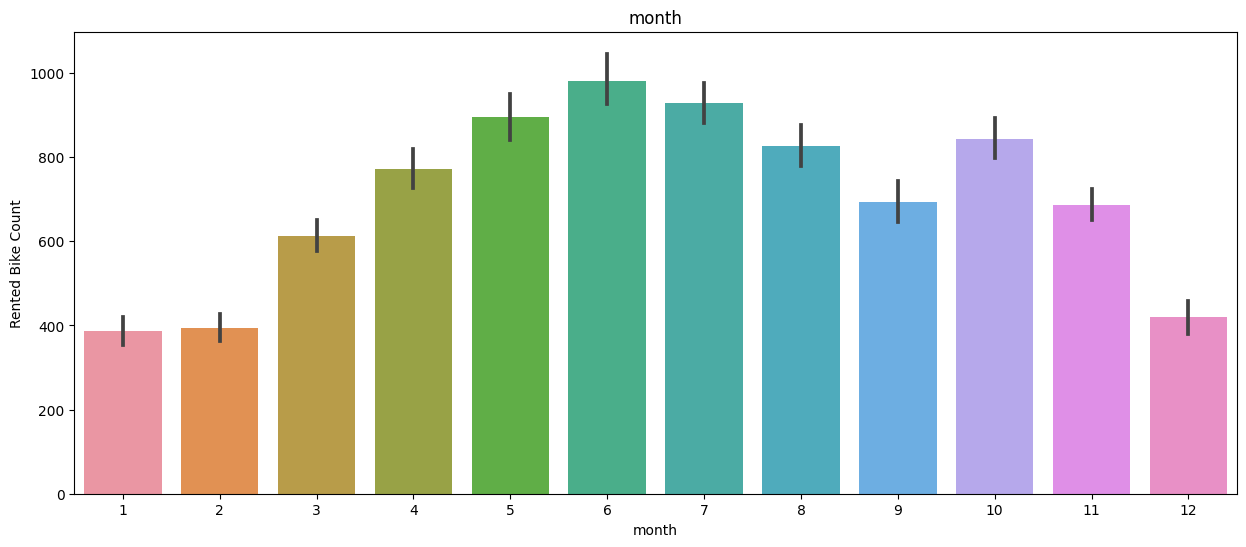

In [110]:
# Chart - 2 visualization code

# Creating a for loop for visualizing all the categorical data with respect to Rented Bike Count.

for i in categorical_data:
    plt.figure(figsize=(15,6))
    plt.title(i)
    sns.barplot(x = data[i], y = data['Rented Bike Count'])
    plt.show()

##### 1. Why did you pick the specific chart?

**To visualise and spread categorical data with respect to Rented Bike Count.**

##### 2. What is/are the insight(s) found from the chart?

1) The peak hours of rented bikes is 5:00PM - 7:00PM and the least bikes are rented between 3:00AM to 5:00AM.

2) June is the peak and January is the bottom months for number of rented bikes.

3) Highest no. of bikes are booked on Thursday and the least on Sunday.

4) People prefer renting bikes most in the Summer season and the least in winter season.

5) People rented more bikes on a non-holiday compared to a holiday.

6) On no functioning day no bikes were rented. we have only 295 counts of "NO". Thus we can drop that 295 values but column having only "Yes' will not add value to our column.So these columns is not use full for us. We will drop those in next steps.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**The above gained insights can definitely help creating a positive business impact, we got to know how time, month, day, season and holiday impact the number of rented bikes, we can make strategies accordingly.**


#### Chart - 3
##Bike Rent Count trend with respect to Hours on Months.(Multivariate analysis)


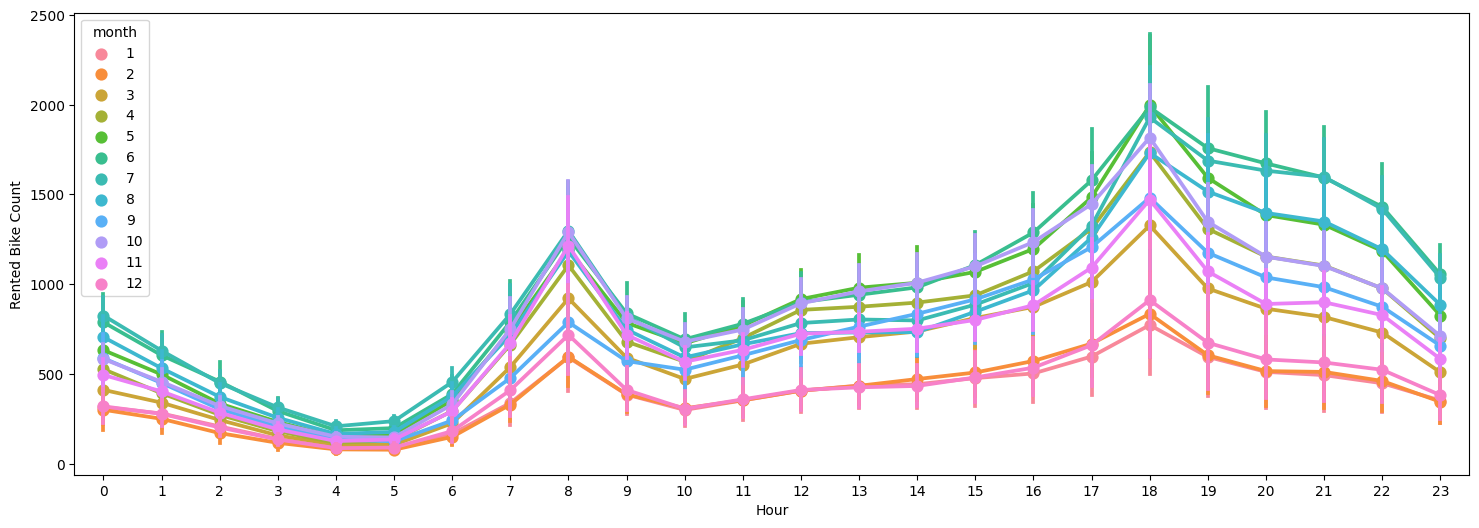

In [111]:
# Chart - 3 visualization code

# Using pointplot for multivariate analysis.

plt.figure(figsize = (18,6))
sns.pointplot(x = data['Hour'], y = data['Rented Bike Count'], hue = data['month'])
plt.show()

##### 1. Why did you pick the specific chart?

**To do a multivariate analysis among Hour, Rented Bike Count and Month**

##### 2. What is/are the insight(s) found from the chart?

**June is the peak and January is the bottom months for number of rented bikes.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**The above gained insights can definitely help creating a positive business impact, we got to know how month impact the number of rented bikes, we can make strategies accordingly.**

#### Chart - 4
## Bike Rent Count trend with respect Hours on Days. (multivariate)

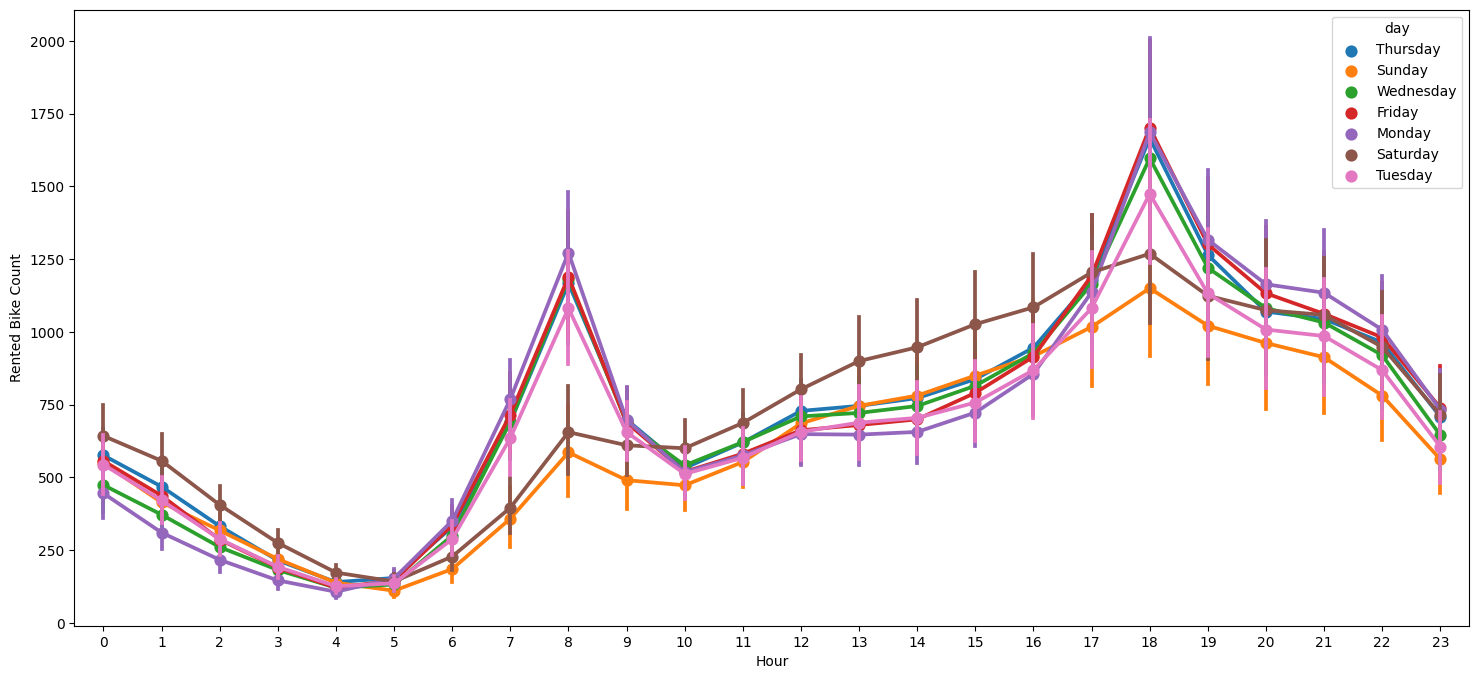

In [112]:
# Chart - 4 visualization code

# Using pointplot for multivariate analysis.

plt.figure(figsize = (18,8))
sns.pointplot(x = data['Hour'], y = data['Rented Bike Count'], hue = data['day'])
plt.show()

##### 1. Why did you pick the specific chart?

To do a multivariate analysis among Hour, Rented Bike Count and Day.

##### 2. What is/are the insight(s) found from the chart?

Highest no. of bikes are booked on Thursday and the least on Sunday.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above gained insights can definitely help creating a positive business impact, we got to know how Days impact the number of rented bikes, we can make strategies accordingly.

#### Chart - 5
## Rented Bike Count vs Hour

Text(0.5, 1.0, 'Average bike rented per hour')

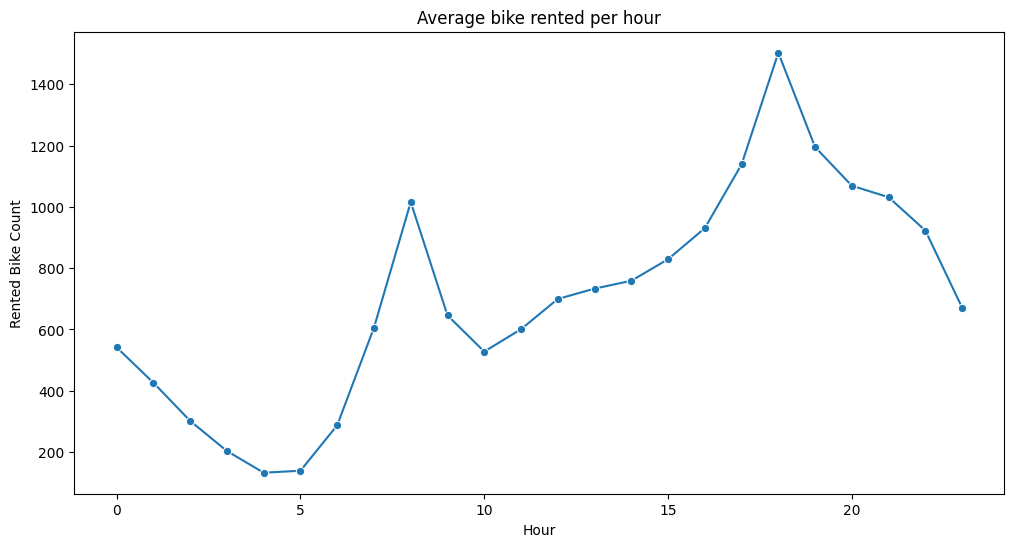

In [113]:
# Chart - 5 visualization code

#ploting line graph
#group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = data.groupby('Hour')['Rented Bike Count'].mean()
plt.figure(figsize=(12,6))
sns.lineplot(data=avg_rent_hrs, marker='o')
plt.title('Average bike rented per hour')

##### 1. Why did you pick the specific chart?

To see how rented bike demand is distributed over 24 hours time we used line plot.

##### 2. What is/are the insight(s) found from the chart?

From above line plot we can clearly see that there is high demand in the morning and in the evening.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, from above insight we know that there is high demand in morning and evening so business needs to focus more on that time slot. as well as try to meet the demand on that time slot.

#### Chart - 6
## Bike Rent Count trend with respect Hours on Seasons.(Multivariate analysis.)

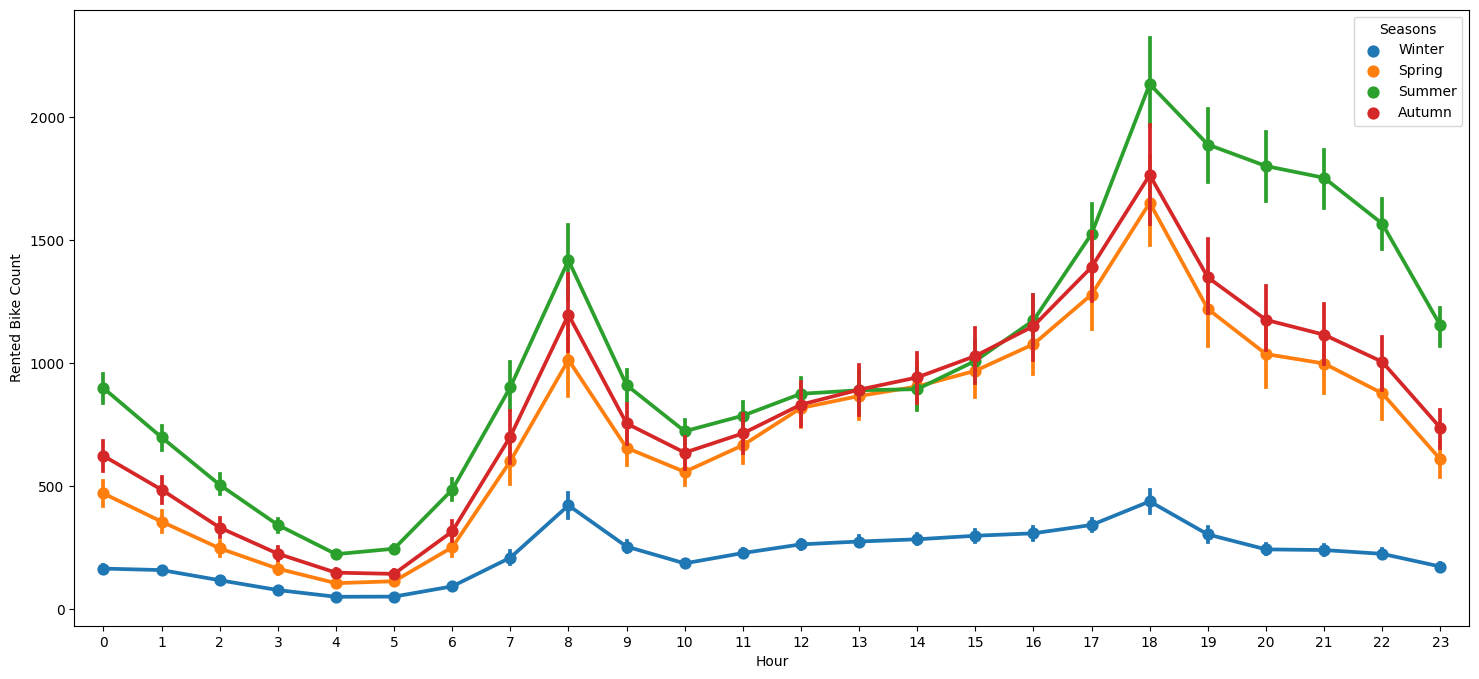

In [114]:
# Chart - 6 visualization code

# Using pointplot for multivariate analysis.

plt.figure(figsize = (18,8))
sns.pointplot(x = data['Hour'], y = data['Rented Bike Count'], hue = data['Seasons'])
plt.show()

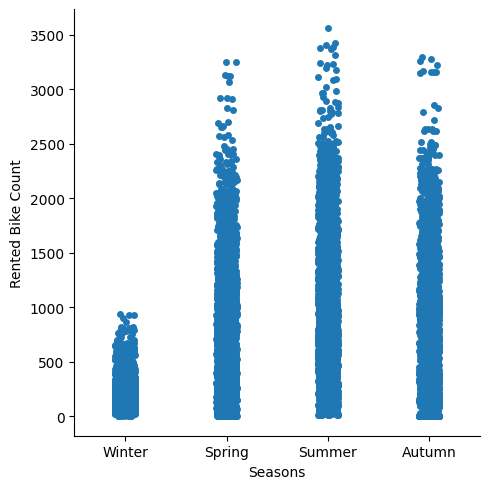

In [115]:
#plot for rented bike count seasonly

sns.catplot(x='Seasons',y='Rented Bike Count',data=data)

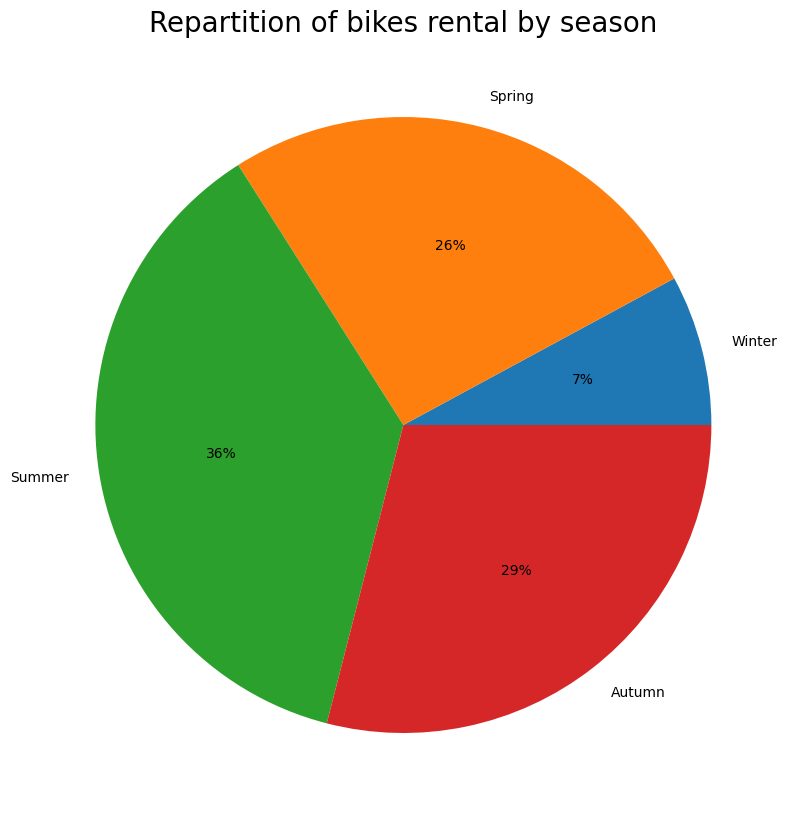

In [116]:
Winter=data[data["Seasons"]=='Winter'].sum()
Spring=data[data["Seasons"]=='Spring'].sum()
Summer=data[data["Seasons"]=='Summer'].sum()
Autumn=data[data["Seasons"]=='Autumn'].sum()

BikeSeasons={"Winter":Winter["Rented Bike Count"],"Spring":Spring["Rented Bike Count"],"Summer":Summer["Rented Bike Count"],"Autumn":Autumn["Rented Bike Count"]}
plt.gcf().set_size_inches(10,10)
plt.pie(BikeSeasons.values(),labels=BikeSeasons.keys(), autopct='%1d%%');
plt.title("Repartition of bikes rental by season", fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?

To do a multivariate analysis among Hour, Rented Bike Count and Months

##### 2. What is/are the insight(s) found from the chart?

People prefer renting bikes most in the Summer season and the least in winter season.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above gained insights can definitely help creating a positive business impact, we got to know how Seasons impact the number of rented bikes, we can make strategies accordingly.

#### Chart - 7
## Bike Rent Count trend with respect Hours on Days.(Multivariate analysis)

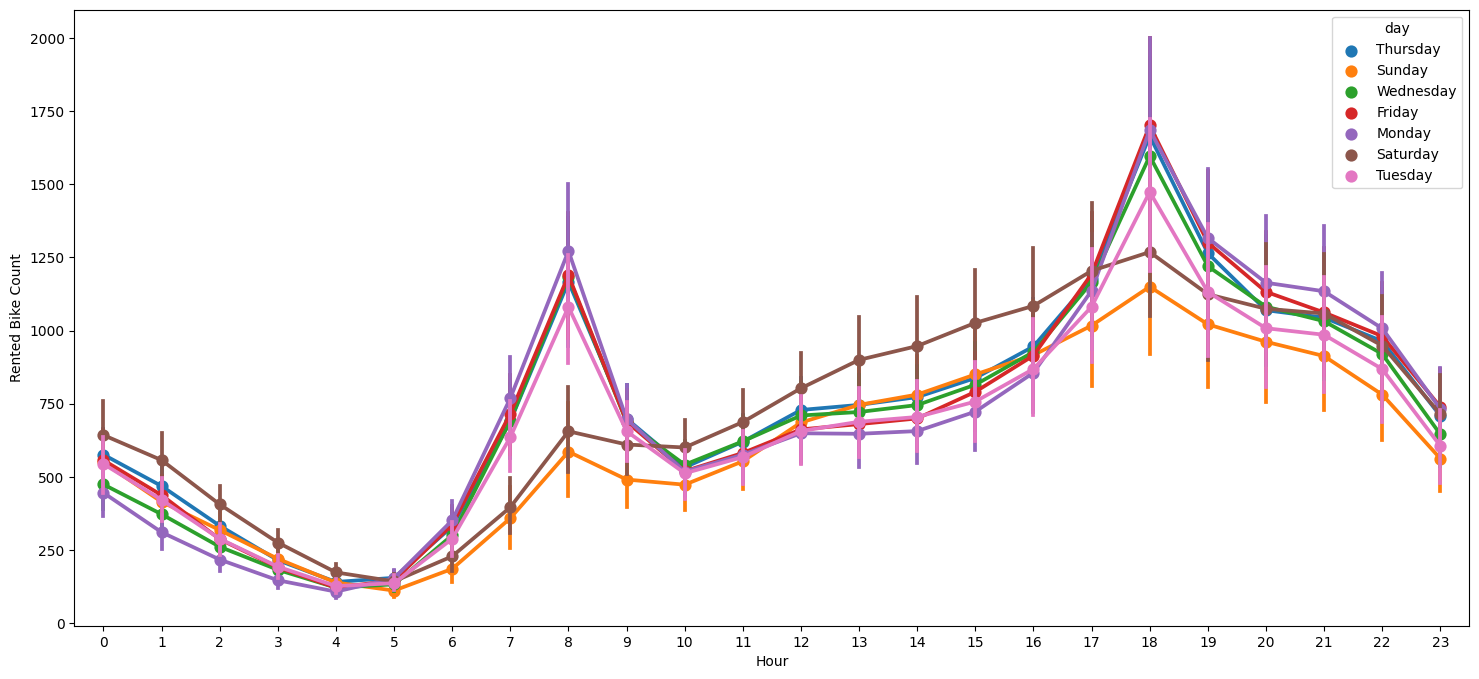

In [117]:
# Chart - 7 visualization code

# Using pointplot for multivariate analysis.

plt.figure(figsize = (18,8))
sns.pointplot(x = data['Hour'], y = data['Rented Bike Count'], hue = data['day'])
plt.show()

##### 1. Why did you pick the specific chart?

**To do a multivariate analysis among Hour, Rented Bike Count and Day.**

##### 2. What is/are the insight(s) found from the chart?

**Highest no. of bikes are booked on Thursday and the least on Sunday.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**The above gained insights can definitely help creating a positive business impact, we got to know how Days impact the number of rented bikes, we can make strategies accordingly.**

#### Chart - 8
## Bike Rent Count trend with respect Hours on Holidays.(multivariate analysis.)


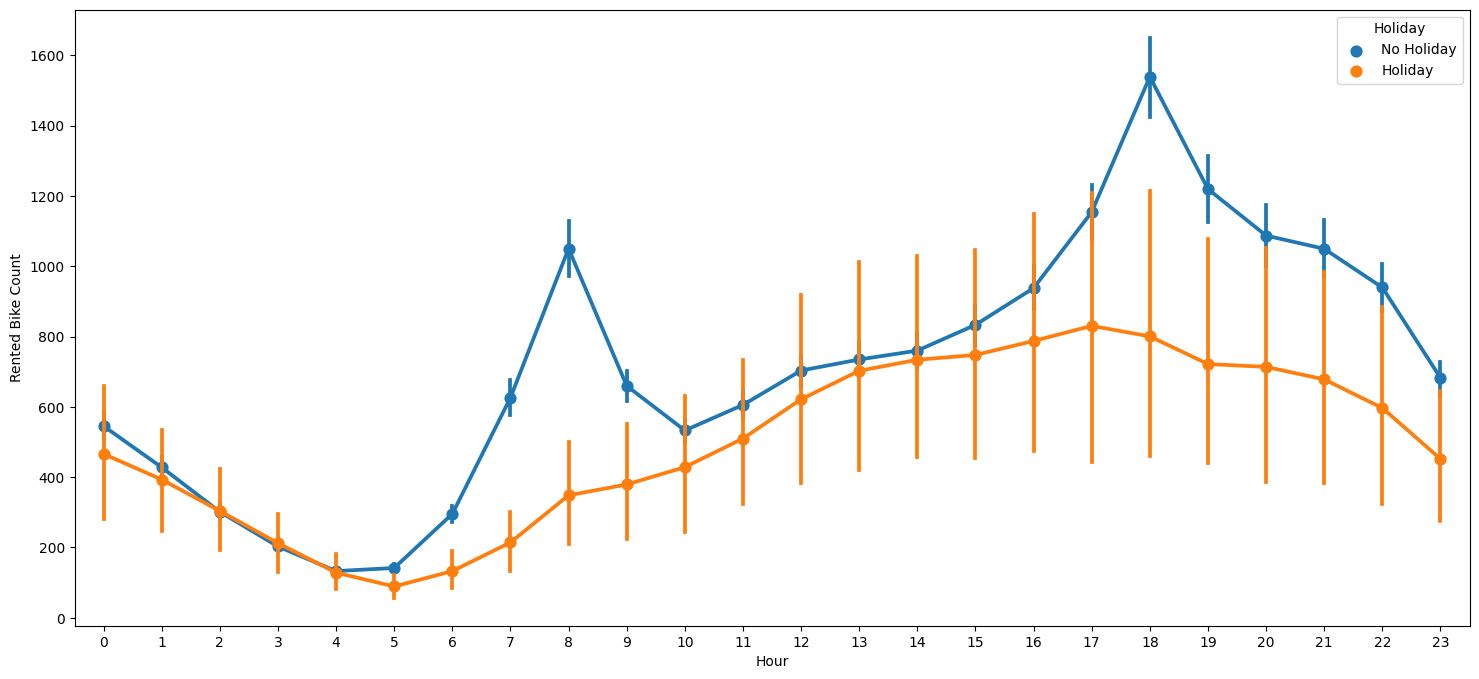

In [118]:
# Chart - 8 visualization code

# Using pointplot for multivariate analysis.

plt.figure(figsize = (18,8))
sns.pointplot(x = data['Hour'], y = data['Rented Bike Count'], hue = data['Holiday'])

plt.show()

##### 1. Why did you pick the specific chart?

To do a multivariate analysis among Hour, Rented Bike Count and Holiday.

##### 2. What is/are the insight(s) found from the chart?

People rented more bikes on a non-holiday compared to a holiday.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above gained insights can definitely help creating a positive business impact, we got to know how Holidays impact the number of rented bikes, we can make strategies accordingly.

#### Chart - 9
## Visualizing outliers using box plot of numeric columns.

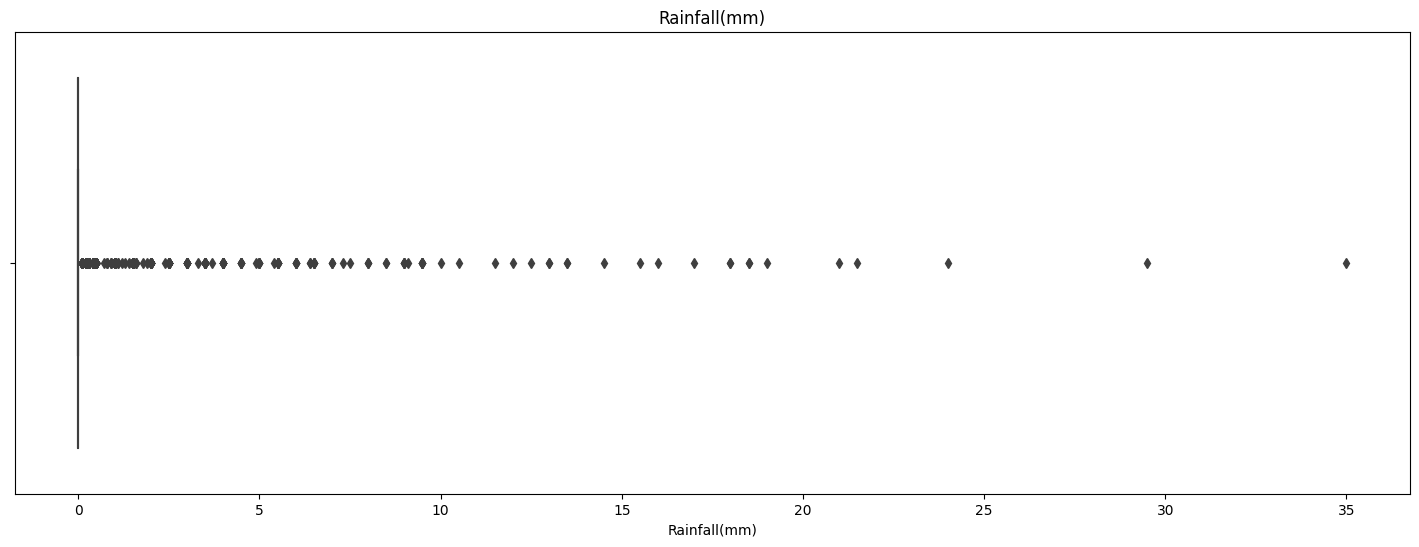

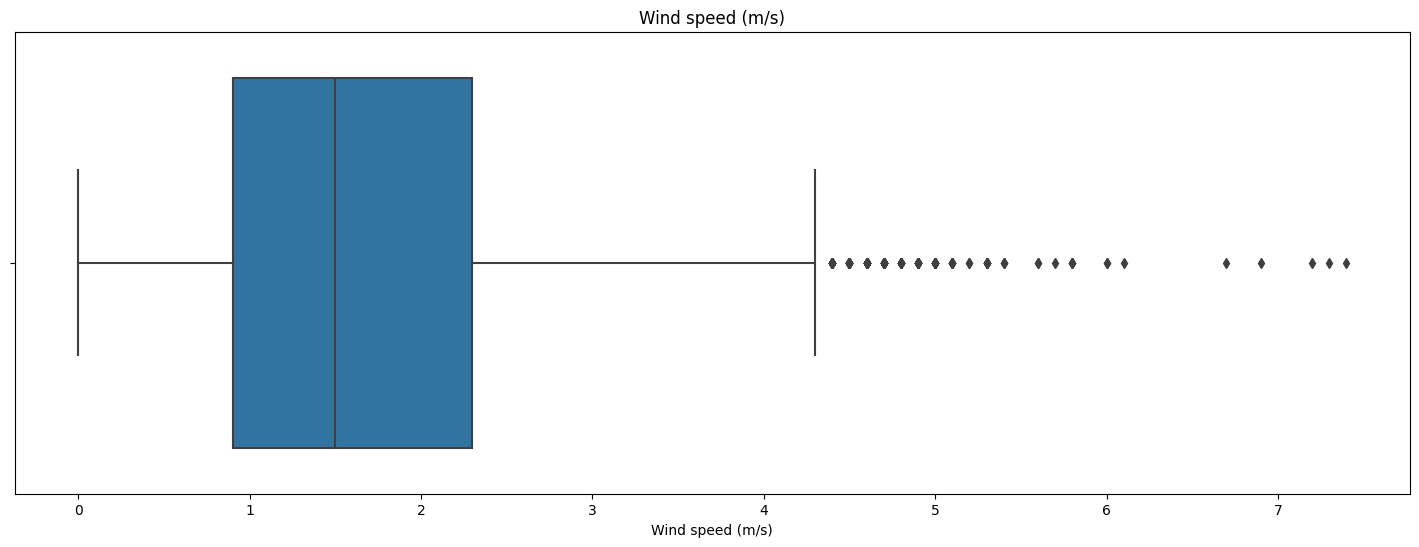

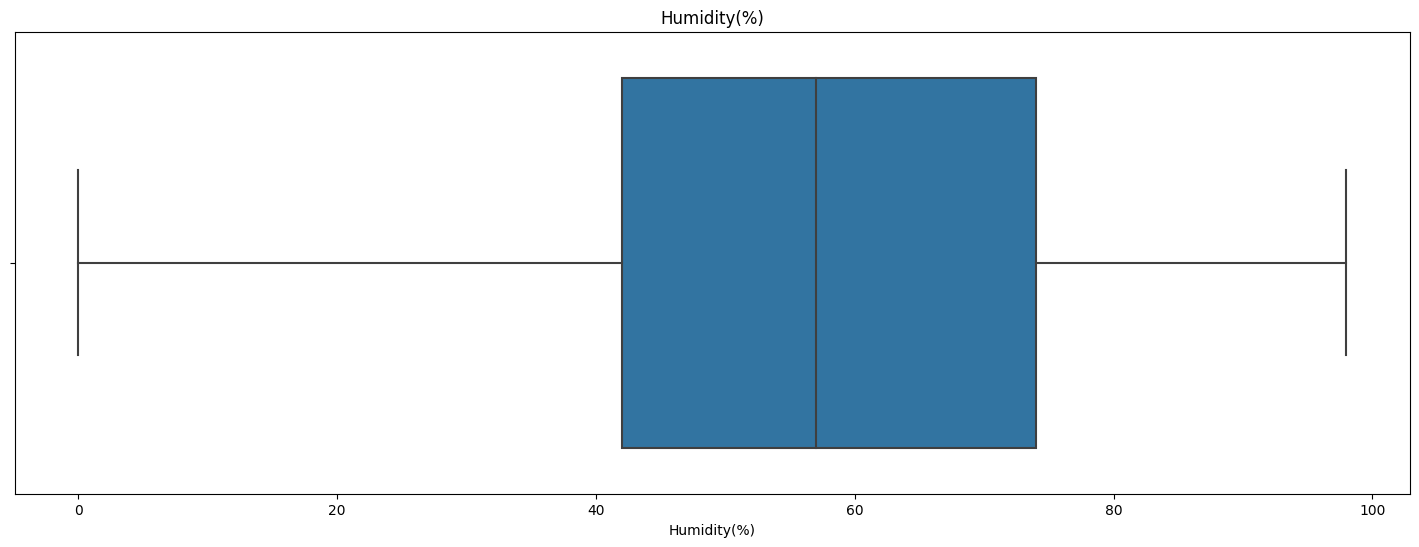

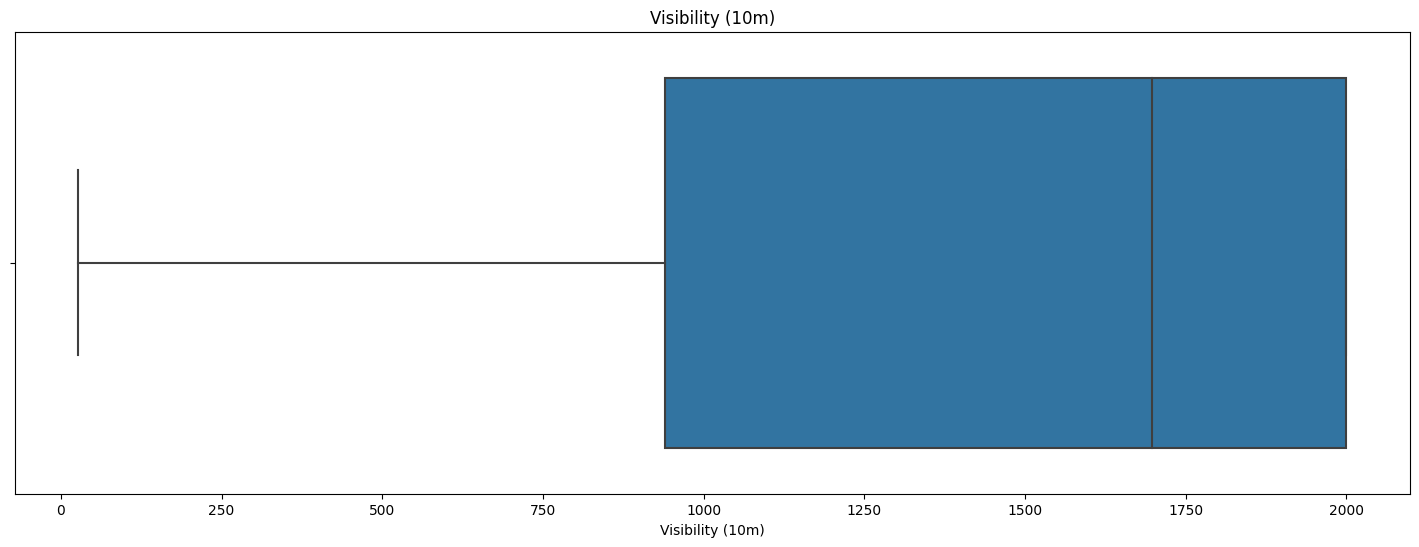

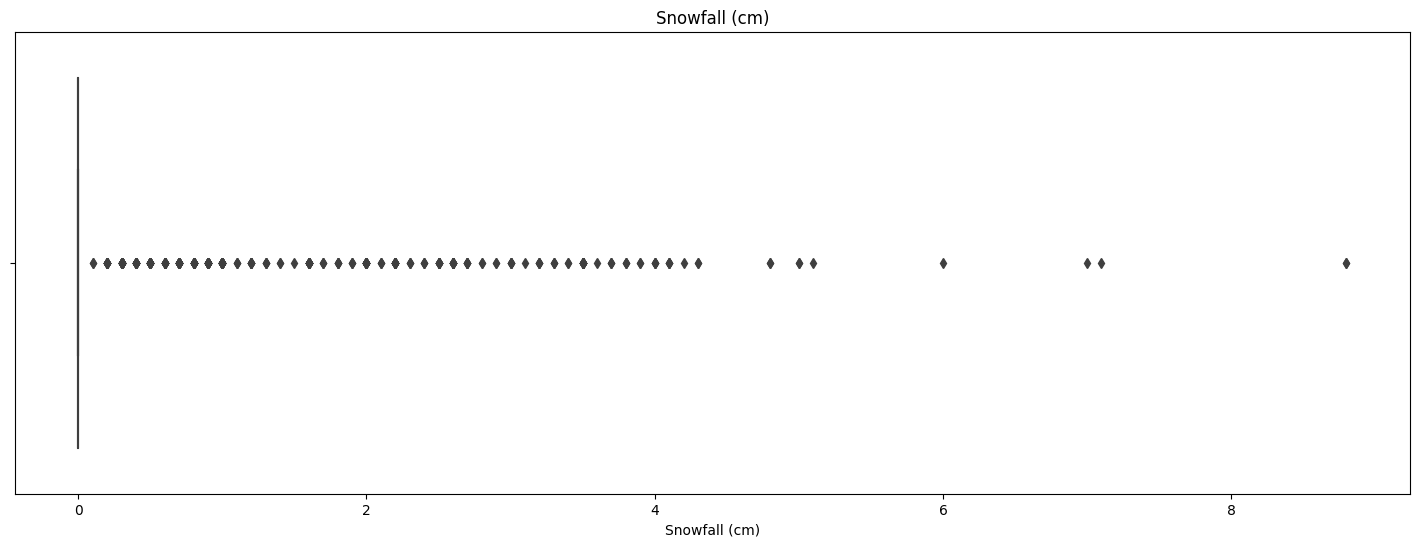

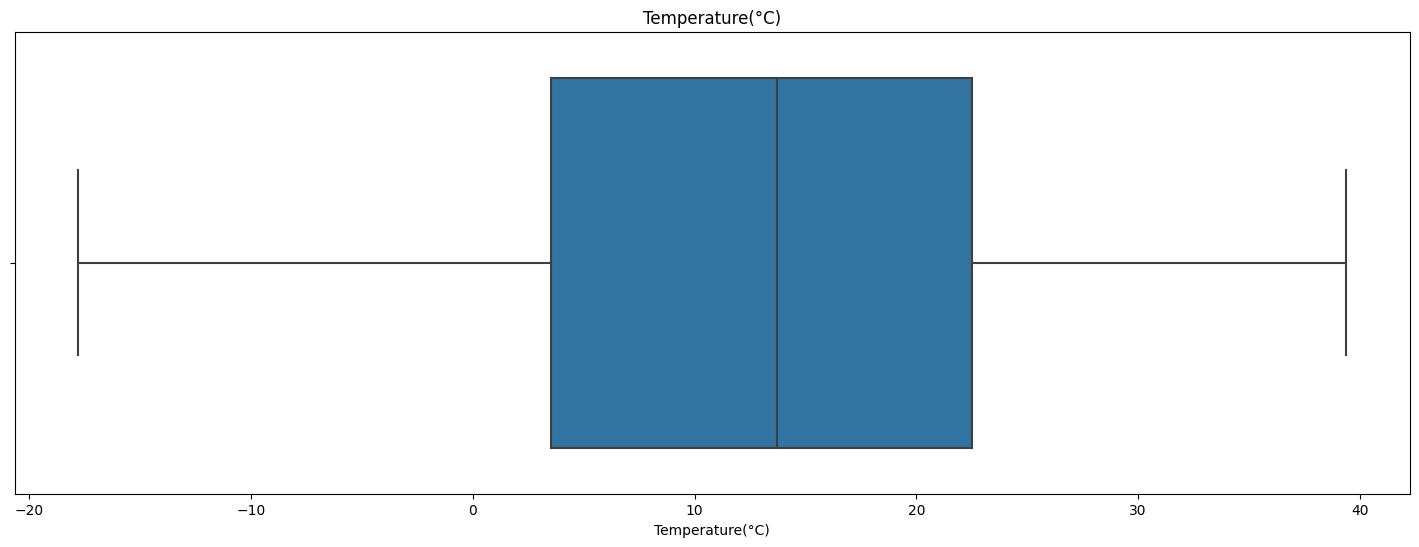

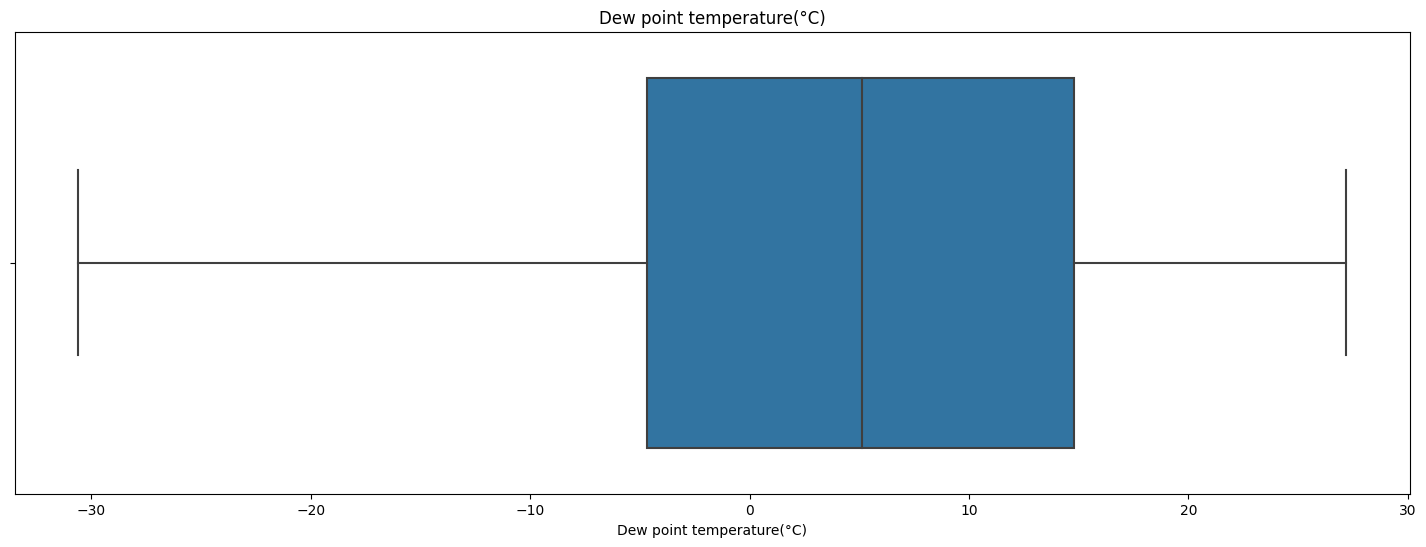

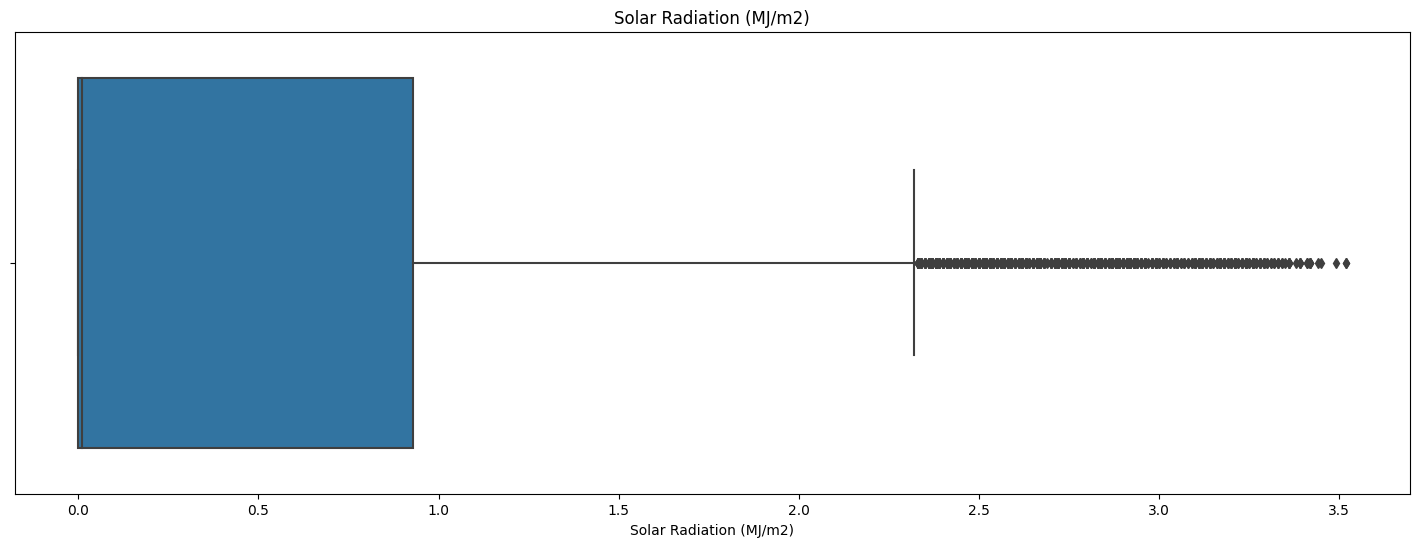

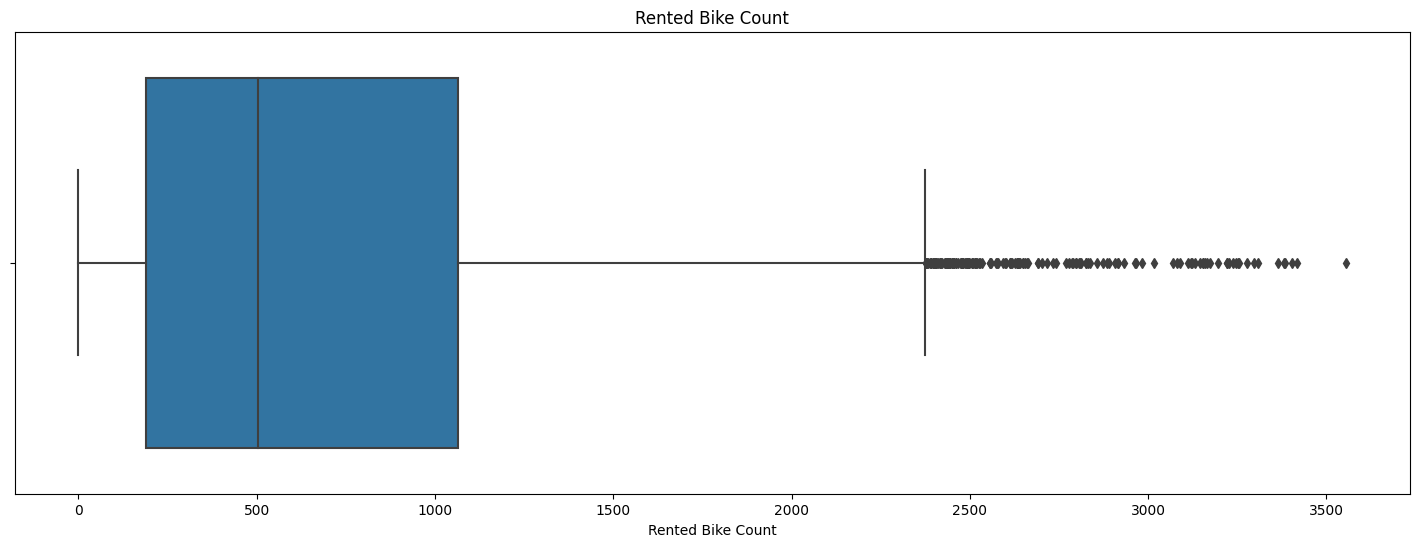

In [119]:
# Chart - 9 visualization code

# Writing code for creating a for loop for numerical variables and creting box plots.

for i in numerical_data:
  plt.figure(figsize = (18,6))
  sns.boxplot(x = data[i])
  plt.title(i)
  plt.show()

##### 1. Why did you pick the specific chart?

Using Boxplots as we need to identify outliers.

##### 2. What is/are the insight(s) found from the chart?

Rainfall, Solar Radiation, Snowfall and Windspeed has high numbers of outliers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In some cases, outliers may represent opportunities for business growth. For example, if there are a small number of customers who are making a significantly higher number of bike rentals than the average customer, this may represent a market segment that can be targeted for special promotions or marketing campaigns.

#### Chart - 10
##Linear relationship between the dependent variable-"Rented Bike Count' and remaining Independent variables.

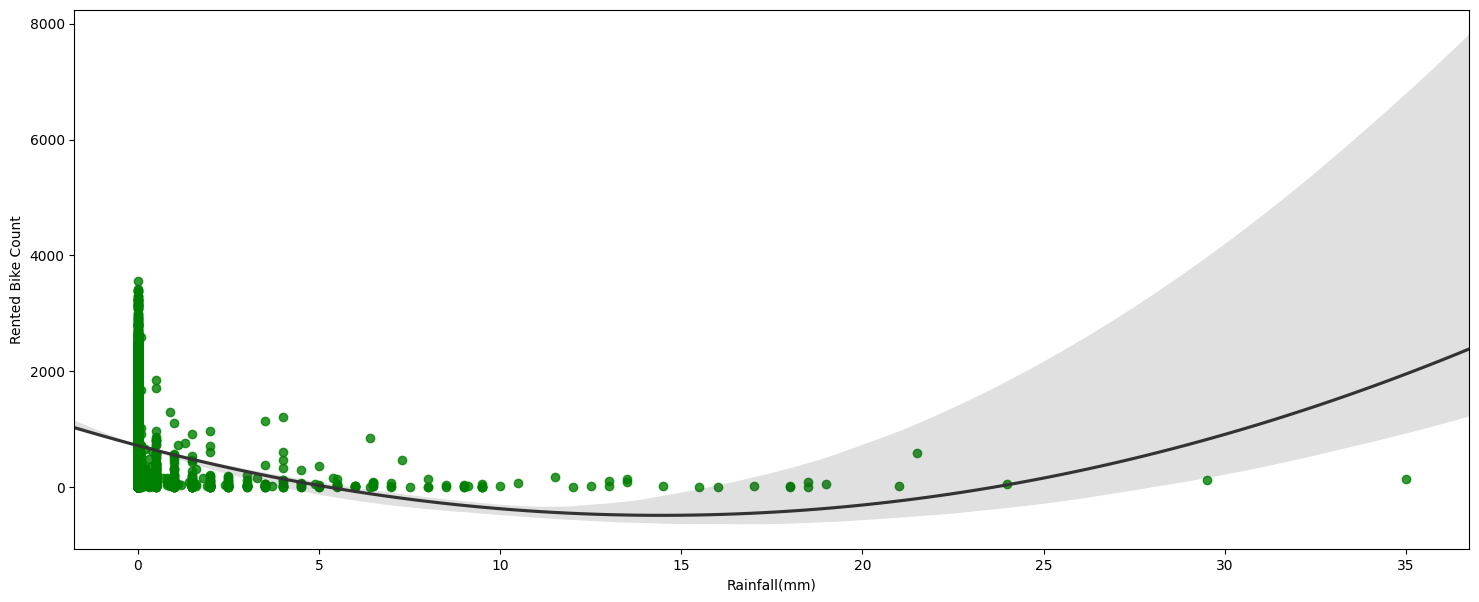

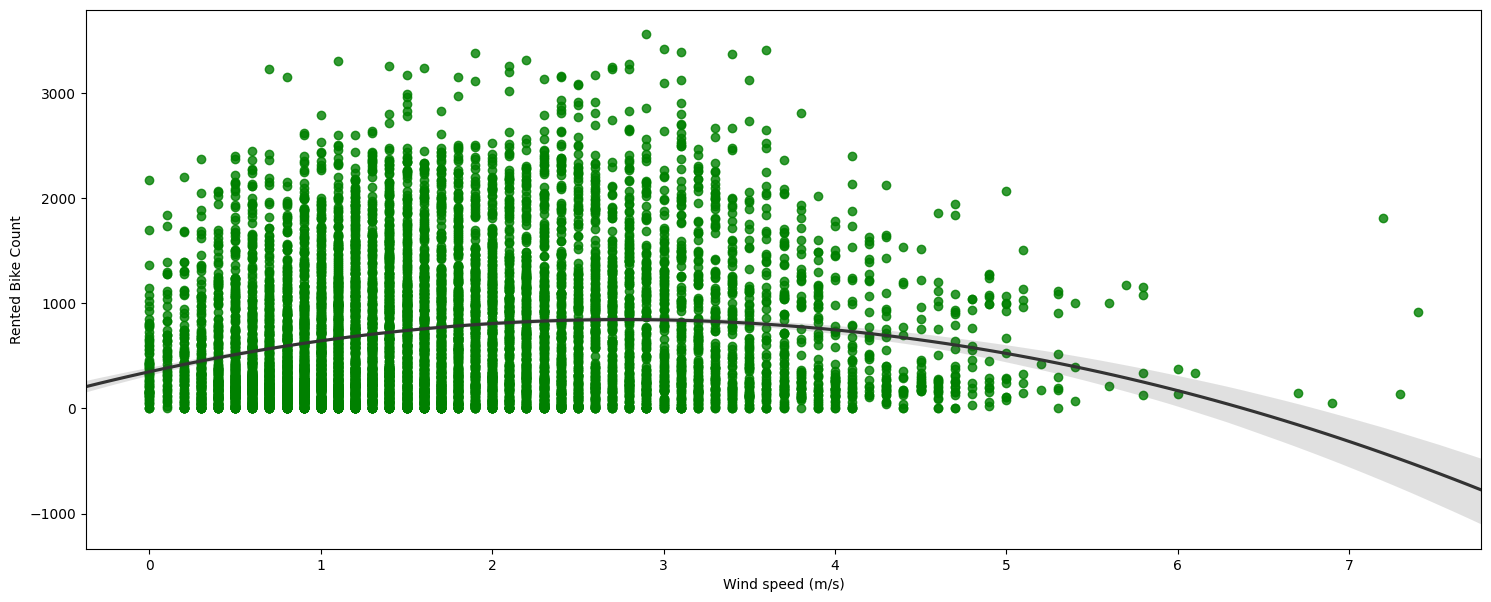

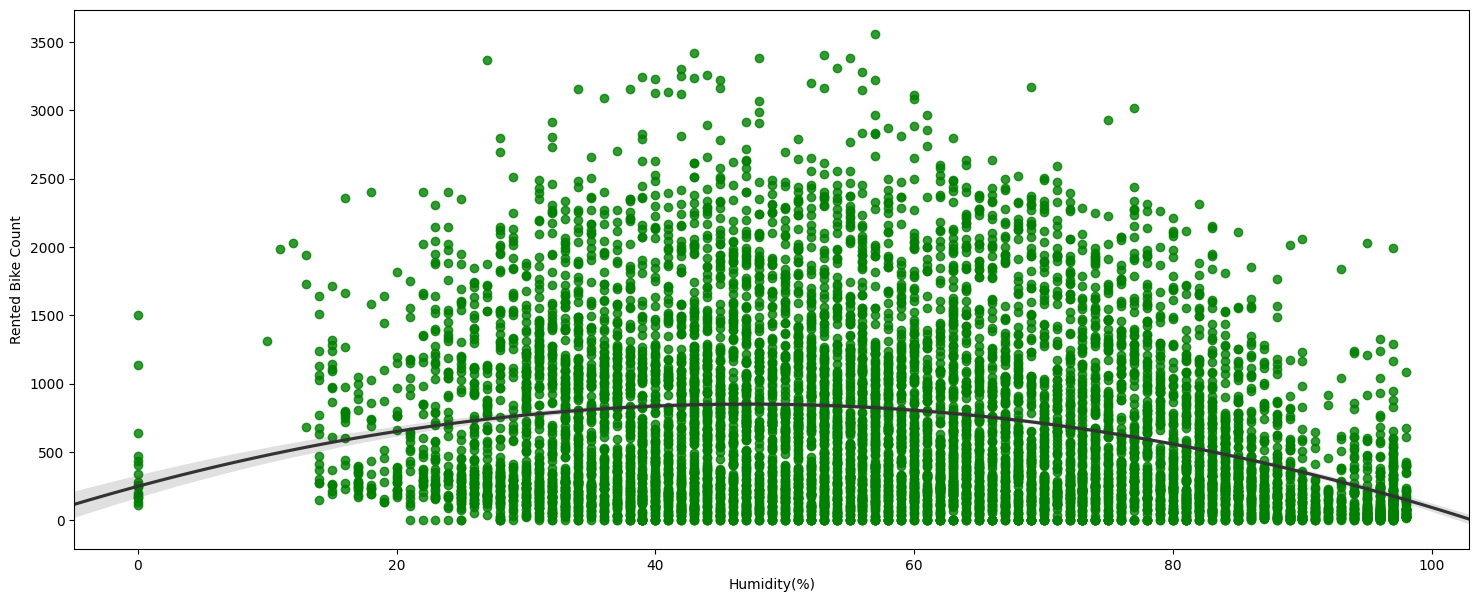

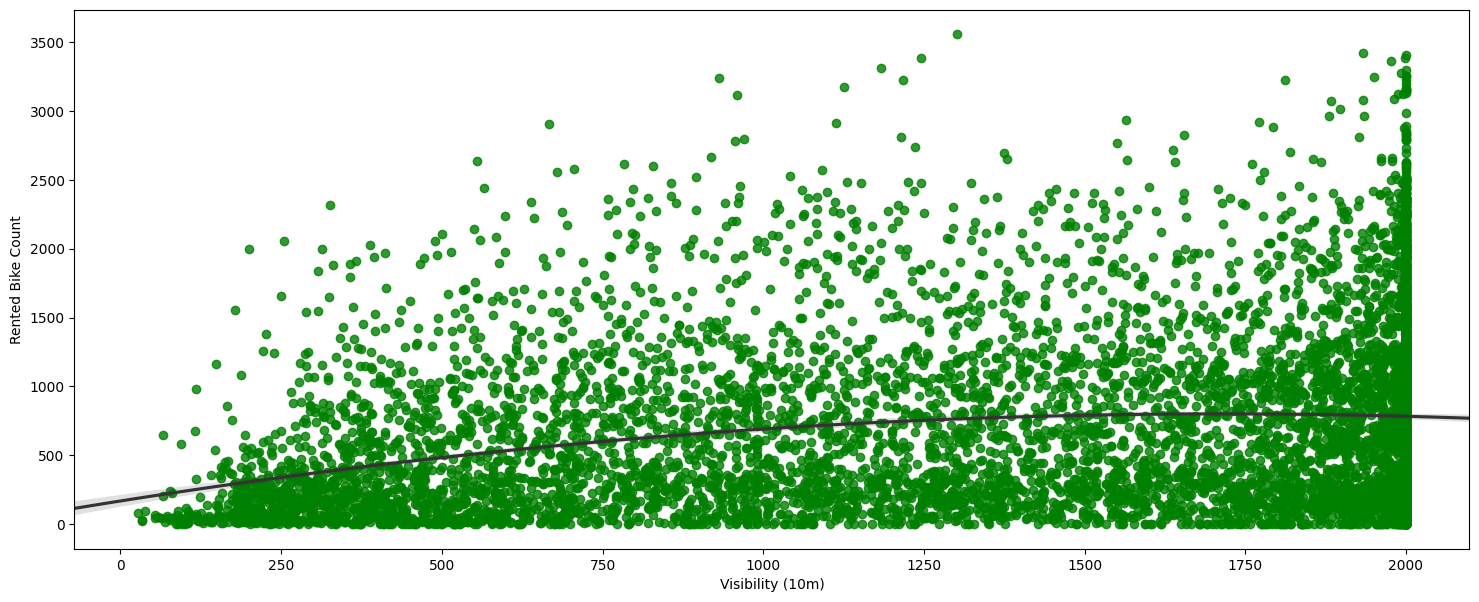

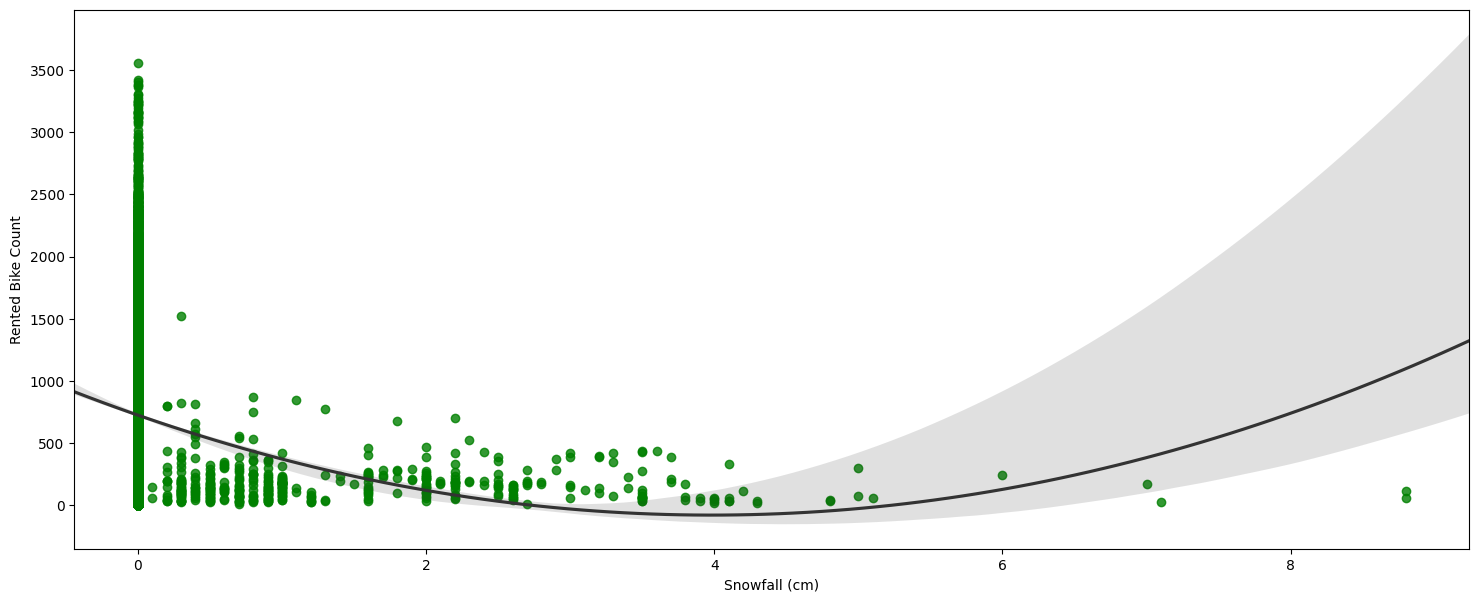

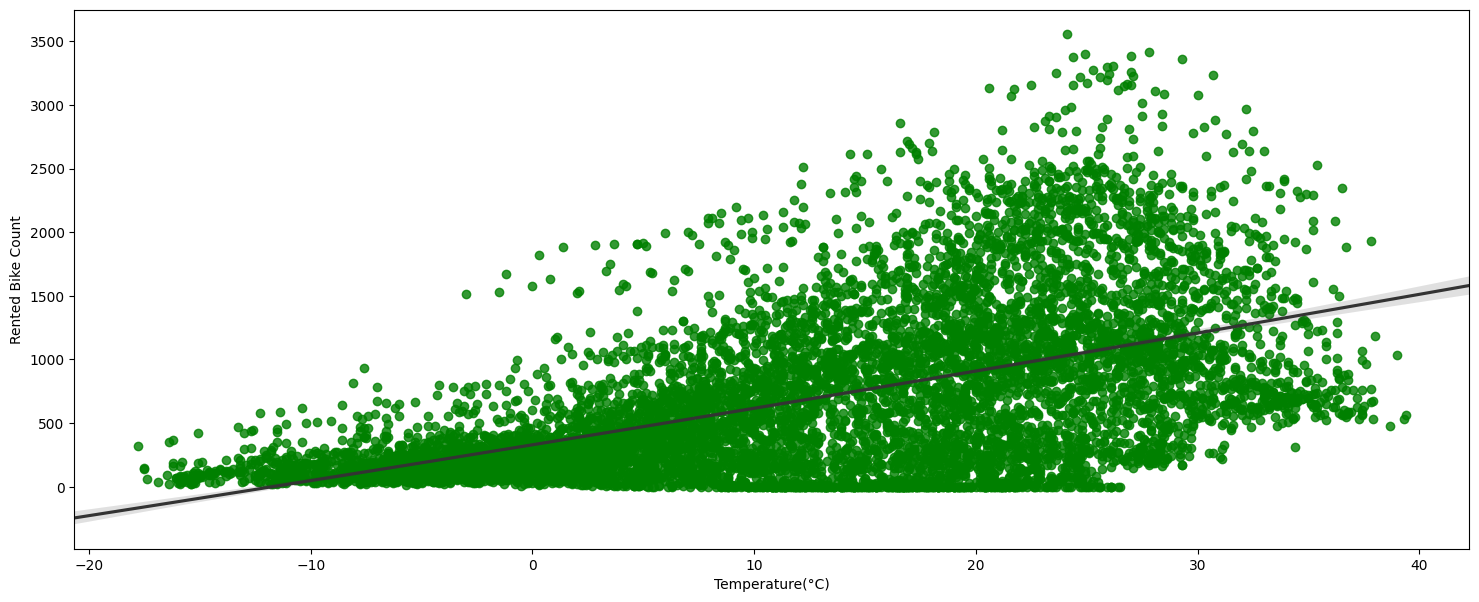

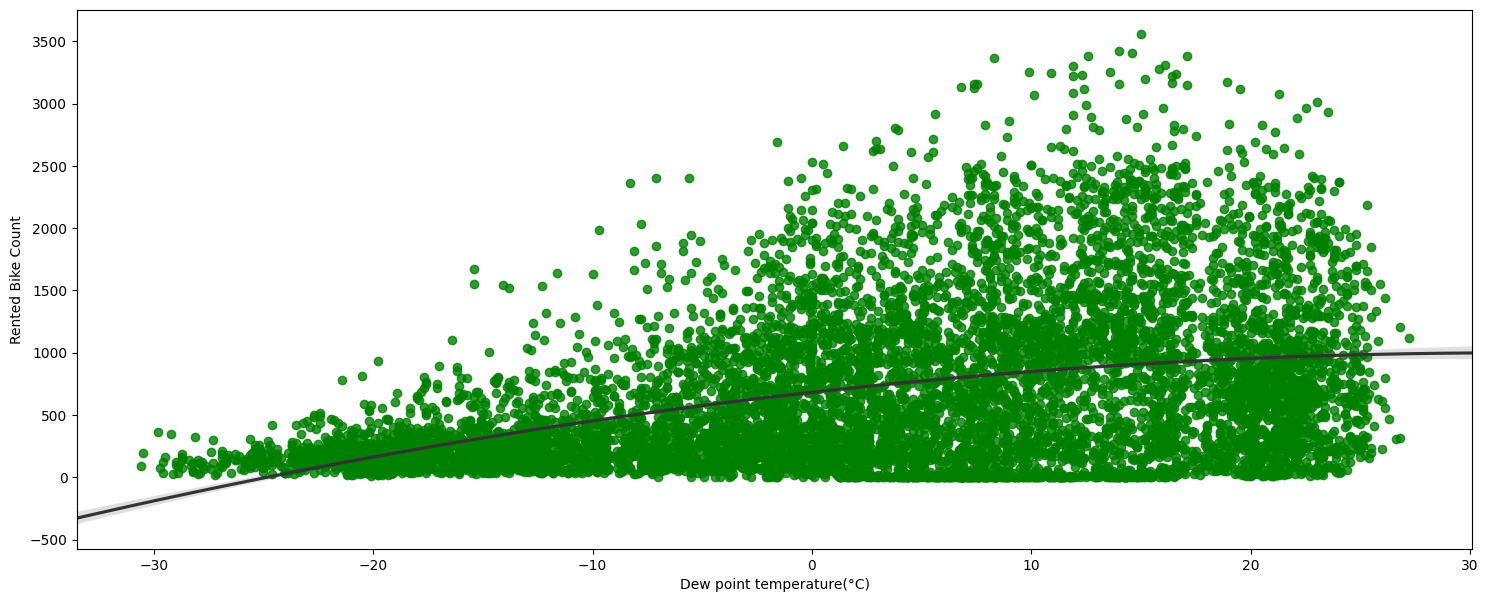

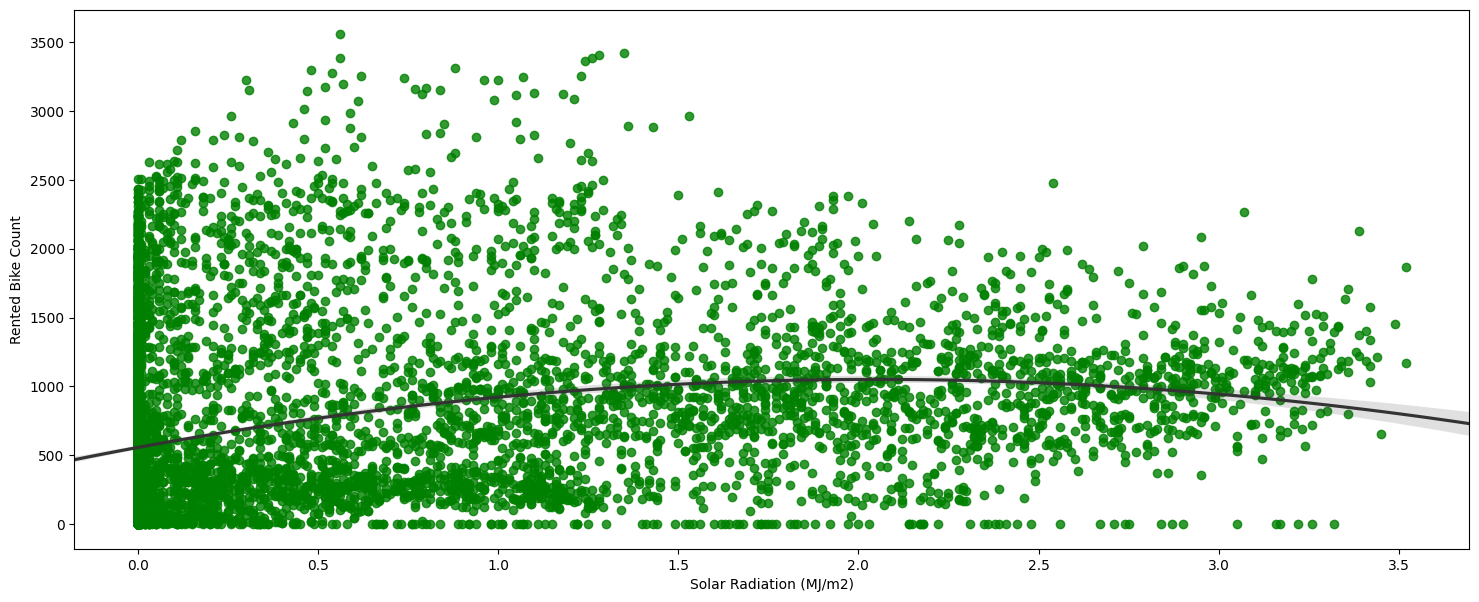

In [120]:
# Chart - 10 visualization code

#visualization code using regplot.

for i in numerical_data:
  if i not in ['Rented Bike Count']:
    fig = plt.figure(figsize = (18,7))
    fig = plt.gca()

    sns.regplot(
        data=data, x=i, y="Rented Bike Count",
        truncate=False, order=2, color=".2",scatter_kws={'color':'green'}
    )
    plt.show()

##### 1. Why did you pick the specific chart?

I used regplot as it allows us to quickly visualize the relationship between two variables and determine whether there is a linear or non-linear relationship between them.

##### 2. What is/are the insight(s) found from the chart?

**Hour:**

1)There is sudden peak between 6/7AM to 10 AM. Office time,College and going time could be the reason for this sudden peak.

2) Again there is peak between 10 AM to 7 PM. may be its office leaving time for the above people.

3) We can say that,from morning 7 AM to Evening 7 PM we have good Bike Rent Count. and from 7 PM to 7 AM Bike Rent count starts declining.

**Temperature :**

1) For decrease in temperature below 0 deg celicus the bike rent count is significantly decreased because may be people dont want to ride bike in such
cold temperature.

2) But for normal temperature the Bike rent count is very high.

**humidity:**

1) Here its seems like humidty is inversely proportional to bike rent count. As humdity percentage is increasing there is decrease in bike rent count.

**Wind Speed:**

1) upto wind speed 4 m/s there is good bike rent count.

**Visibility:**
1) It's very obivious that as visibilty increases the bike rent count also increases. Nobody would prefere to ride in low visibilty.

**Dew Point Temperature:**

1)It's again the same case as of temperature. As dew temperature goes below 0 deg celcius there is less bike rent count. It looks like Dew Point temperature and Temperature columns have strong colinarity.

**Solar radiation:**
1)Here the amount of rented bikes is huge, when there is solar radiation.

**Rainfall And snowfall:**
1) Its very obivious that people usually do not like ride bikes in rain and snowfall.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above gained insights can definitely help creating a positive business impact, we got to know how the variables impact the number of rented bikes, we can make strategies accordingly.

#### Chart - 11

## Visualizing the data distribution on the dependent variable before normalization.



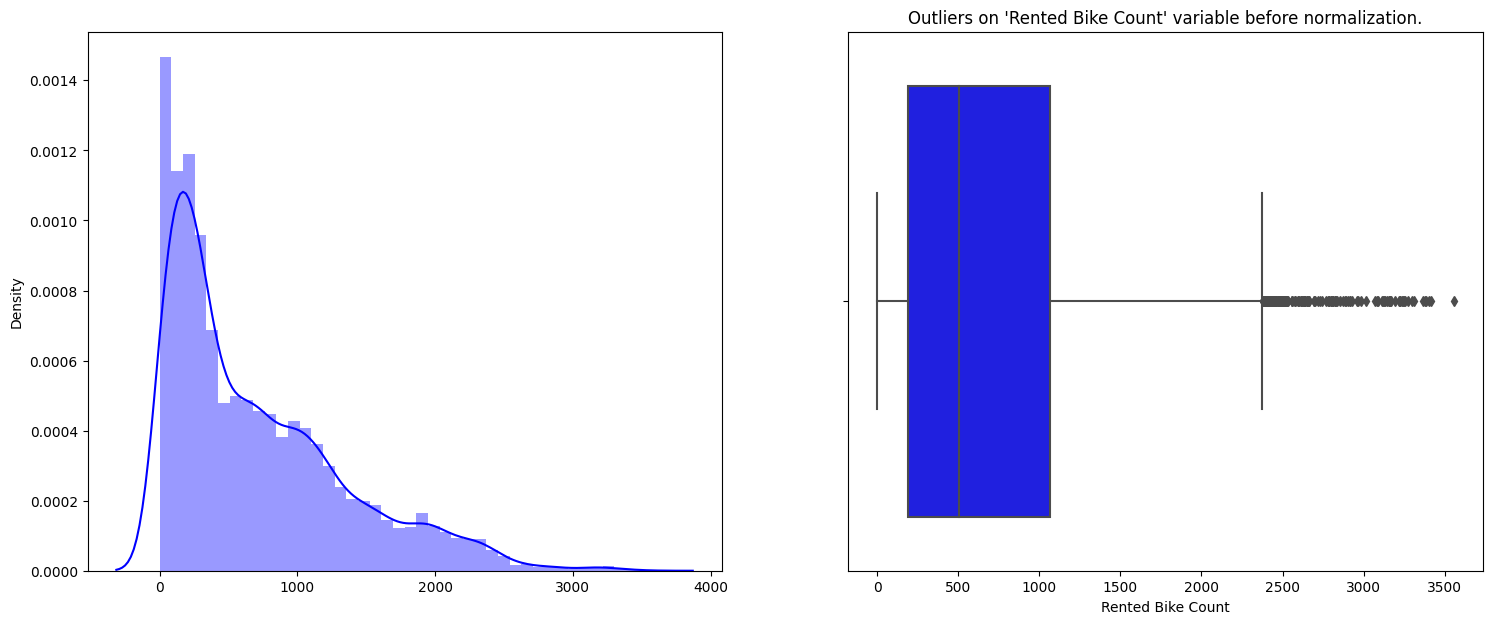

In [121]:
# Chart - 11 visualization code

# Visualizing the data distribution on the dependent variable using distplot and boxplot charts.

f, axes = plt.subplots(1, 2,figsize=(18,7))
sns.distplot(x=(data['Rented Bike Count']),color='b',ax=axes[0])
sns.boxplot(x=(data['Rented Bike Count']),color='b',ax=axes[1])
plt.title("Outliers on 'Rented Bike Count' variable before normalization.")
plt.show()

## Visualizing the data distribution on the dependent variable after normalization.

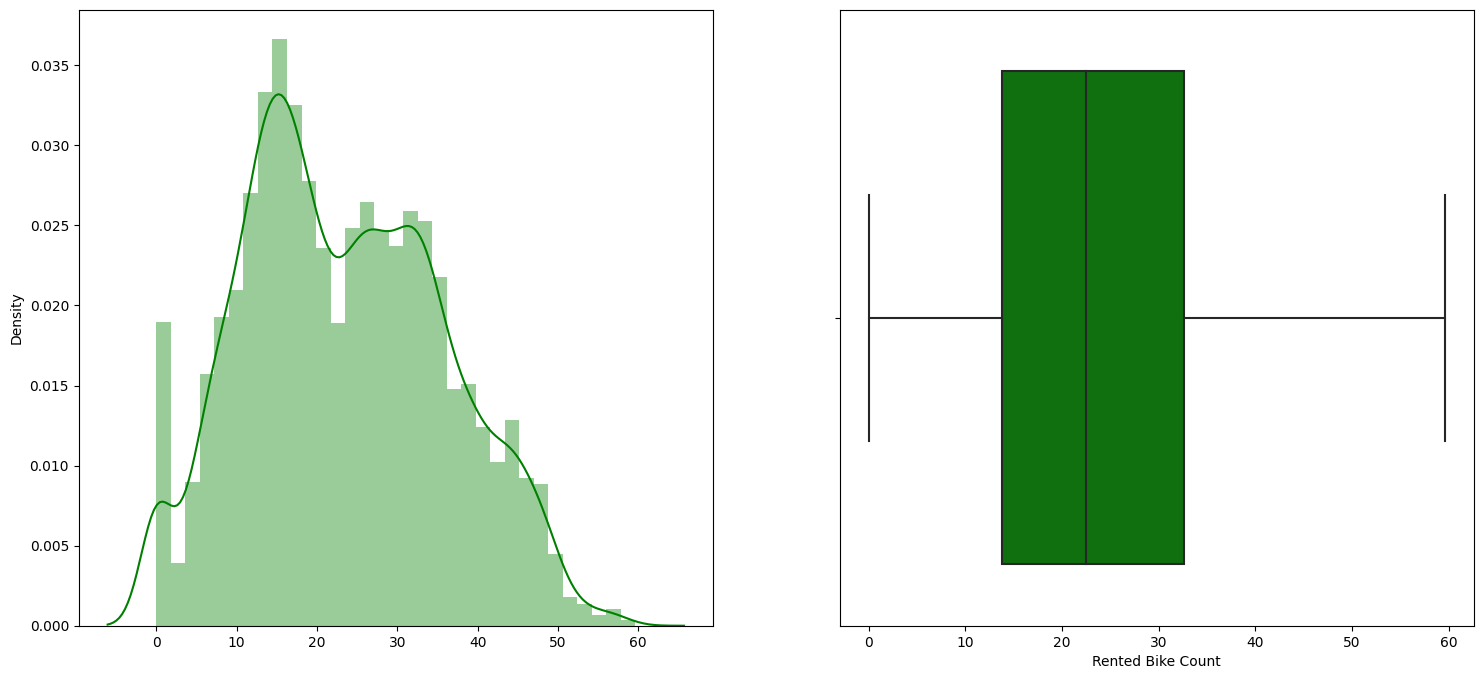

In [122]:
# Normalizing  our target variable by squre root method

f, axes = plt.subplots(1, 2,figsize=(18,8))
sns.distplot(x=np.sqrt(data['Rented Bike Count']),color='g',ax=axes[0])
sns.boxplot(x=np.sqrt(data['Rented Bike Count']),color='g',ax=axes[1])
plt.show()

##### 1. Why did you pick the specific chart?

Used distplot to visualize the distribution of data and using boxplot to detect outliers.

##### 2. What is/are the insight(s) found from the chart?

As we can see from both the charts the distribution of the data is less skewed and is moving towards normally distributed data

The outliers are also gone after normalization.





##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Improved accuracy, comparability and better visualization are the result of normalization which can improve model performance.


#### Chart - 12

##Visualizing the numerical before and after square root normalization.

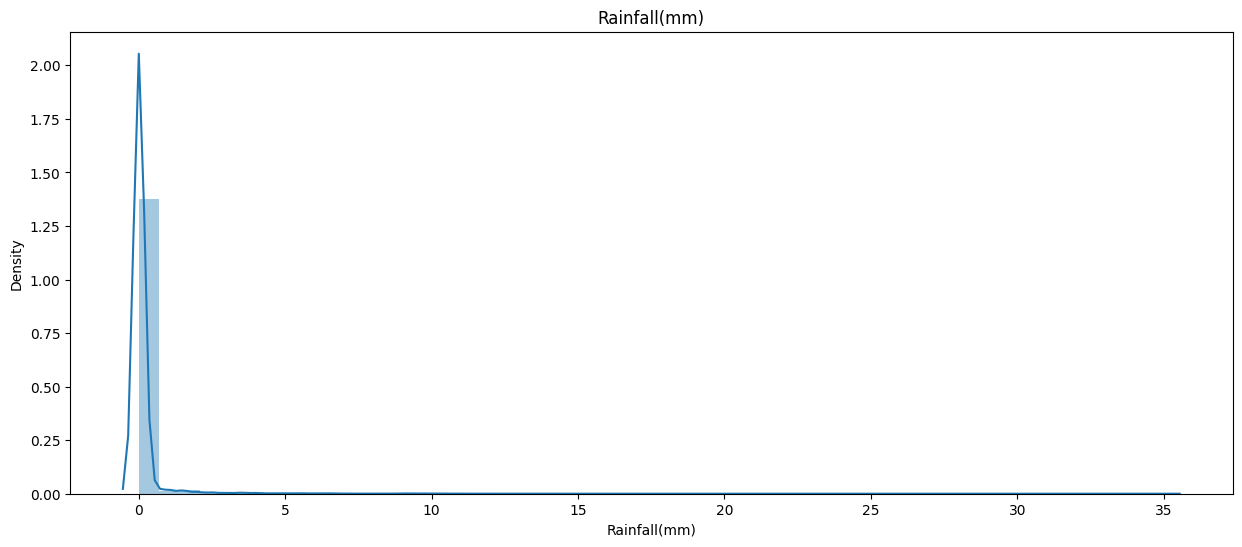

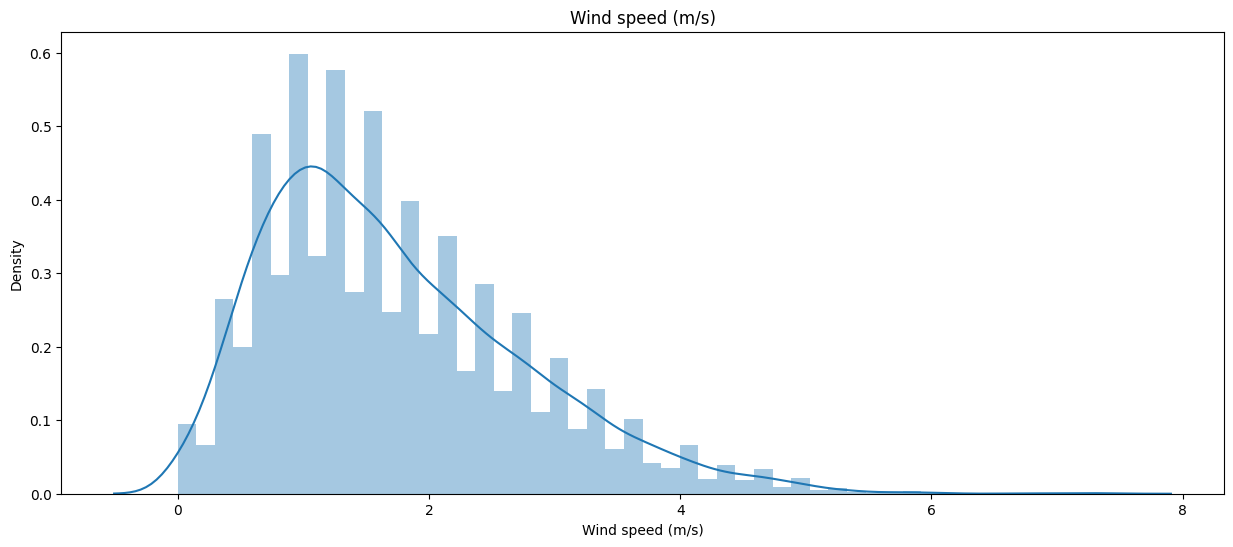

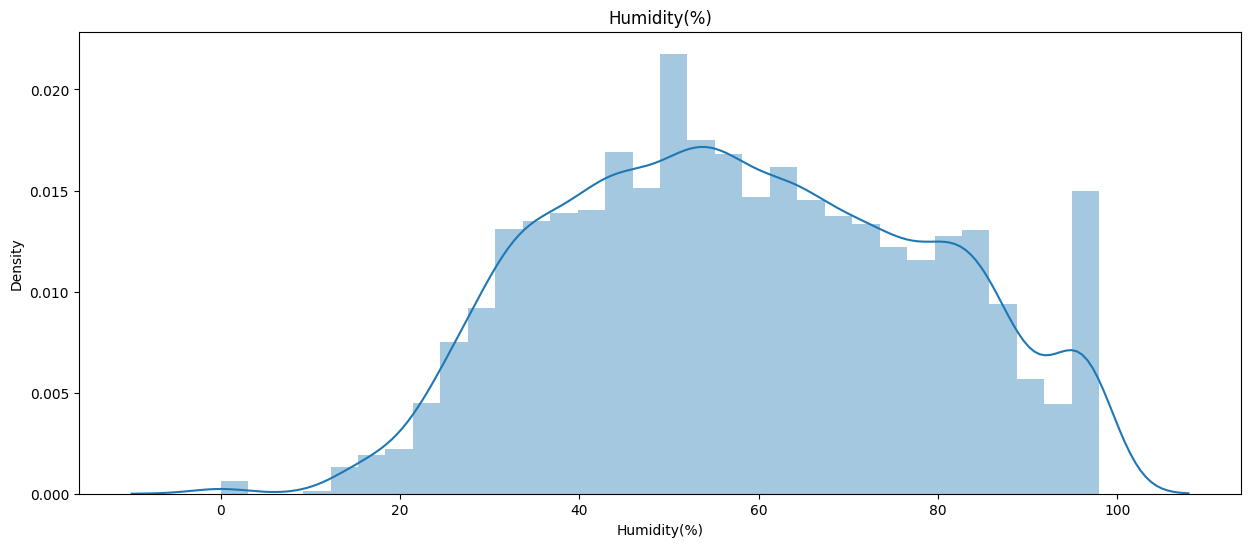

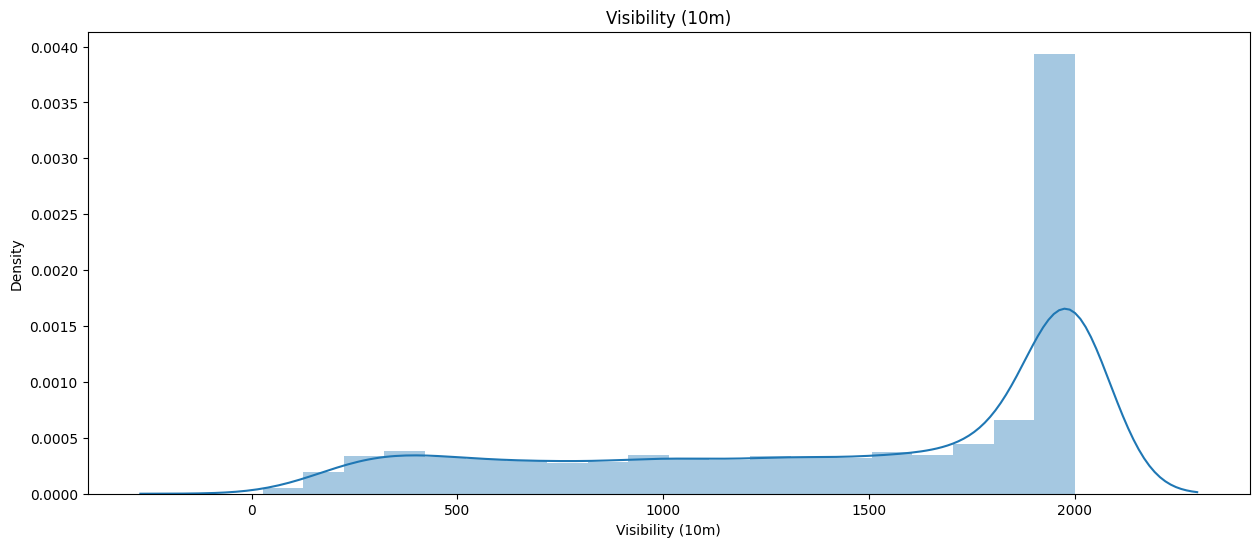

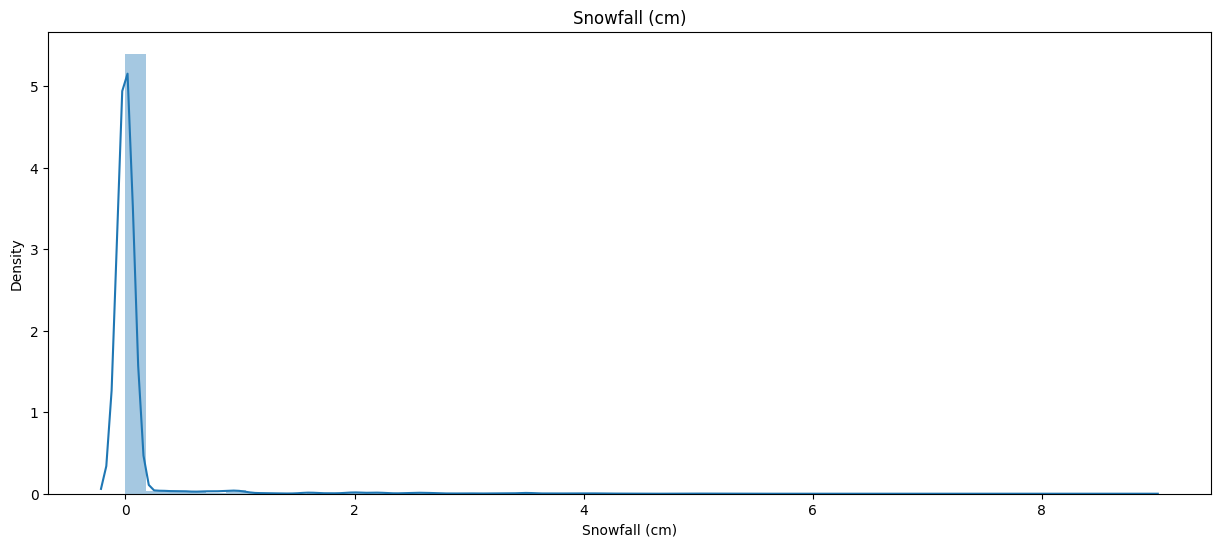

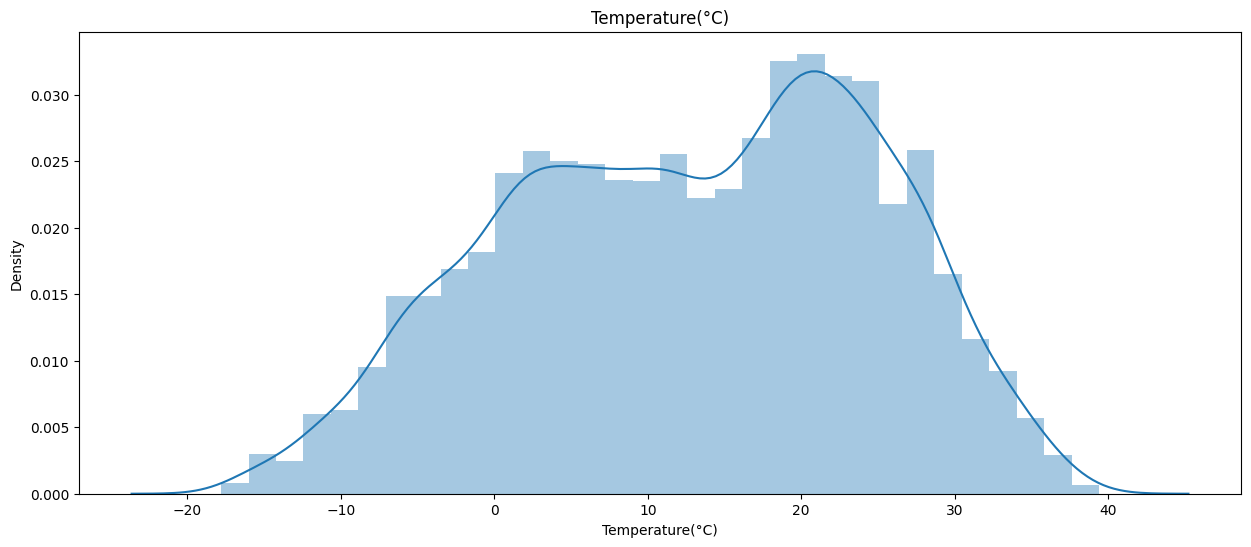

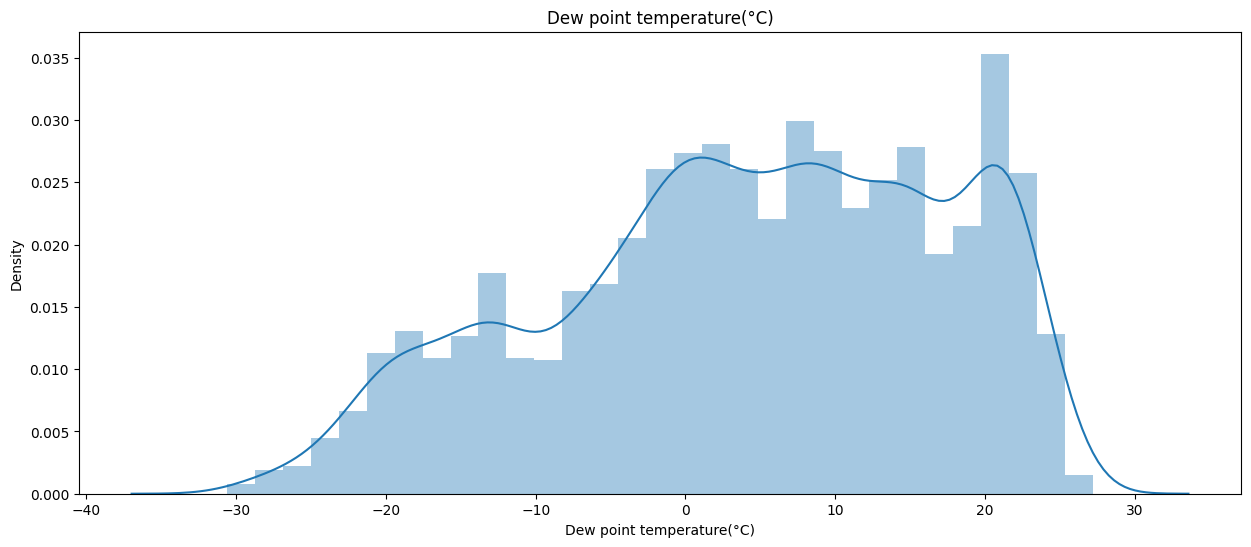

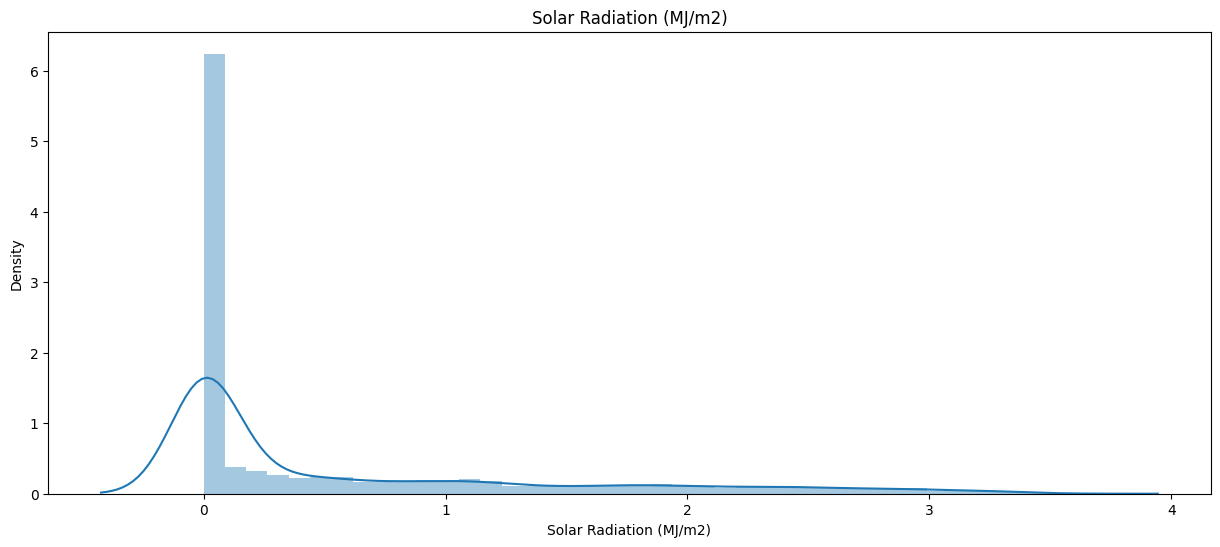

In [123]:
# Chart - 12 visualization code
# Creating a for loop for visualizing all the numerical variables using distplot.

for i in numerical_data:
  if i not in ['Rented Bike Count']:
    plt.figure(figsize=(15,6))
    plt.title(i)
    sns.distplot(data[i] )
    plt.show()


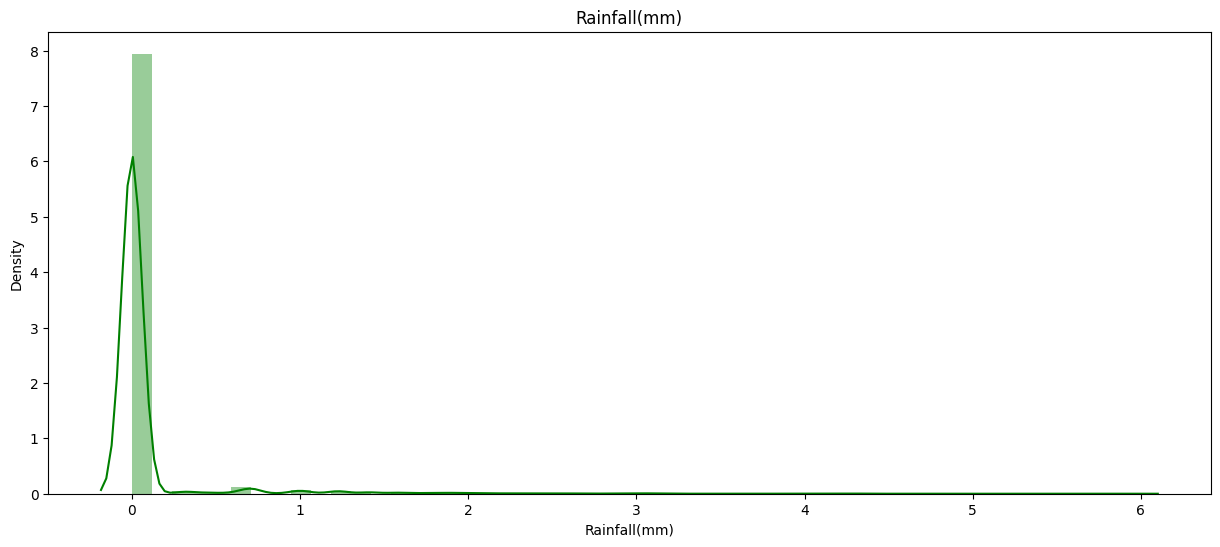

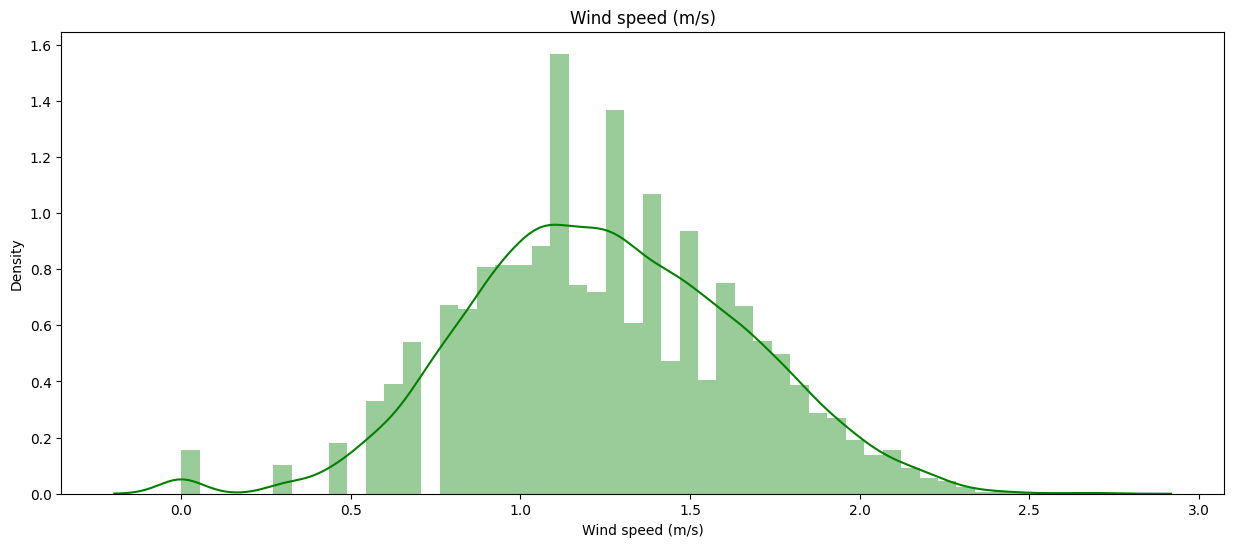

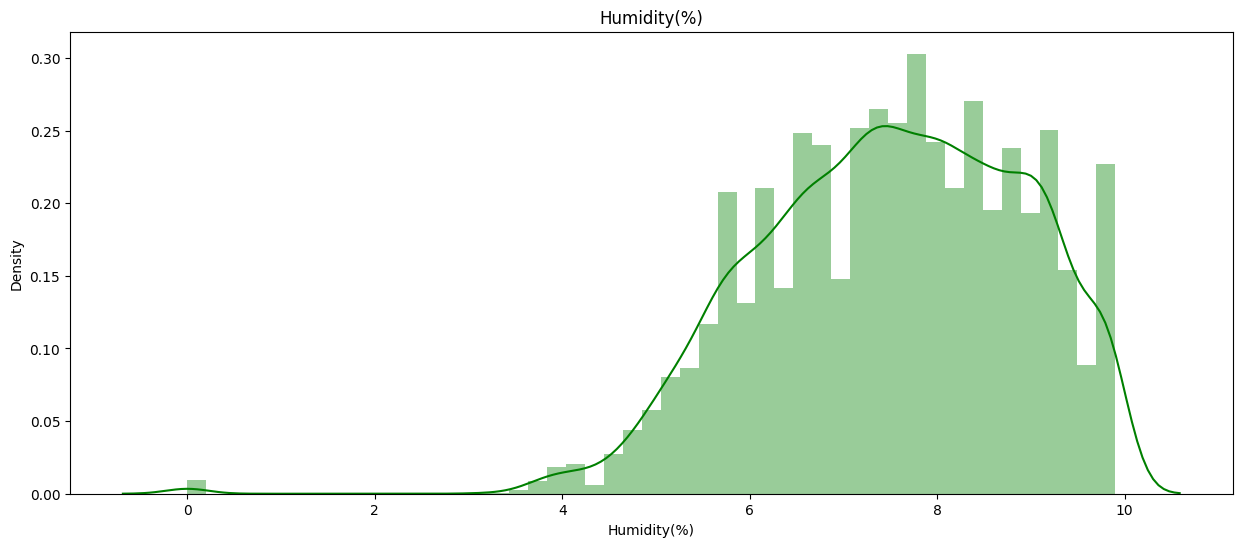

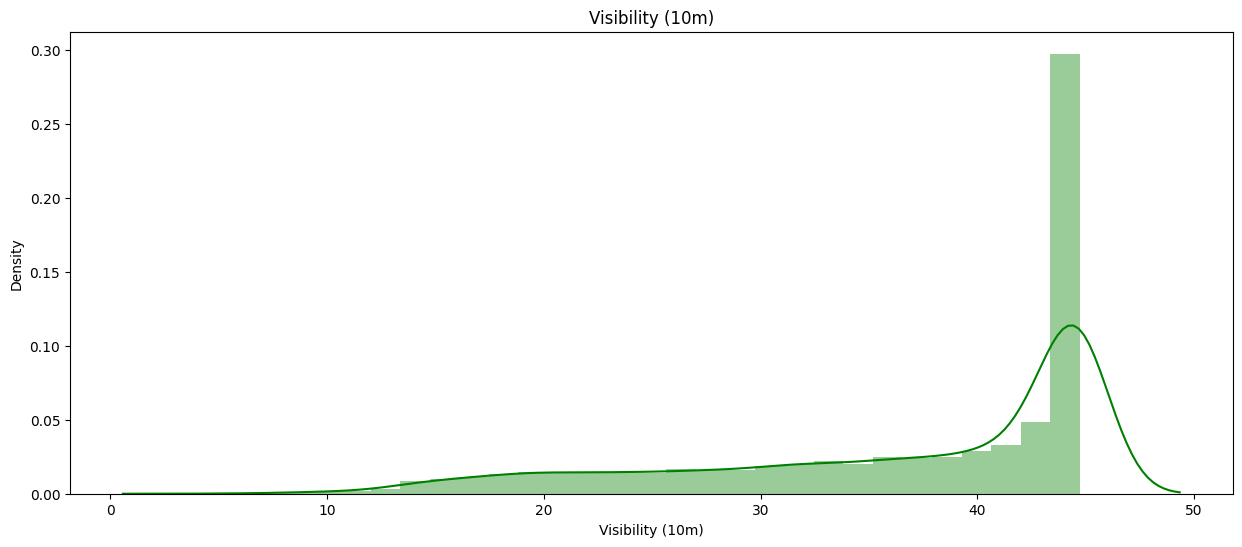

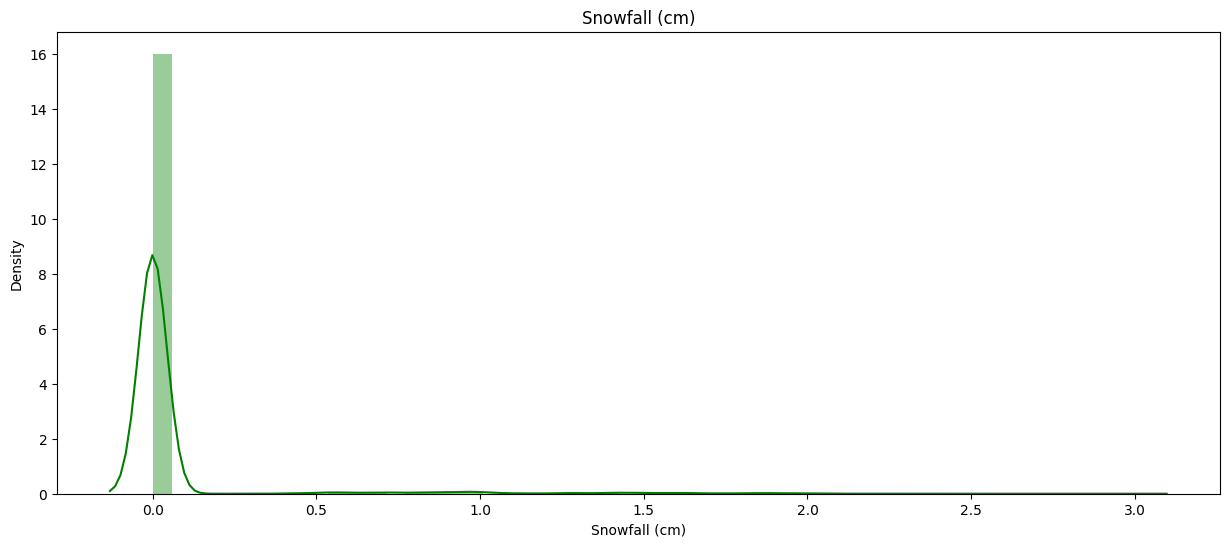

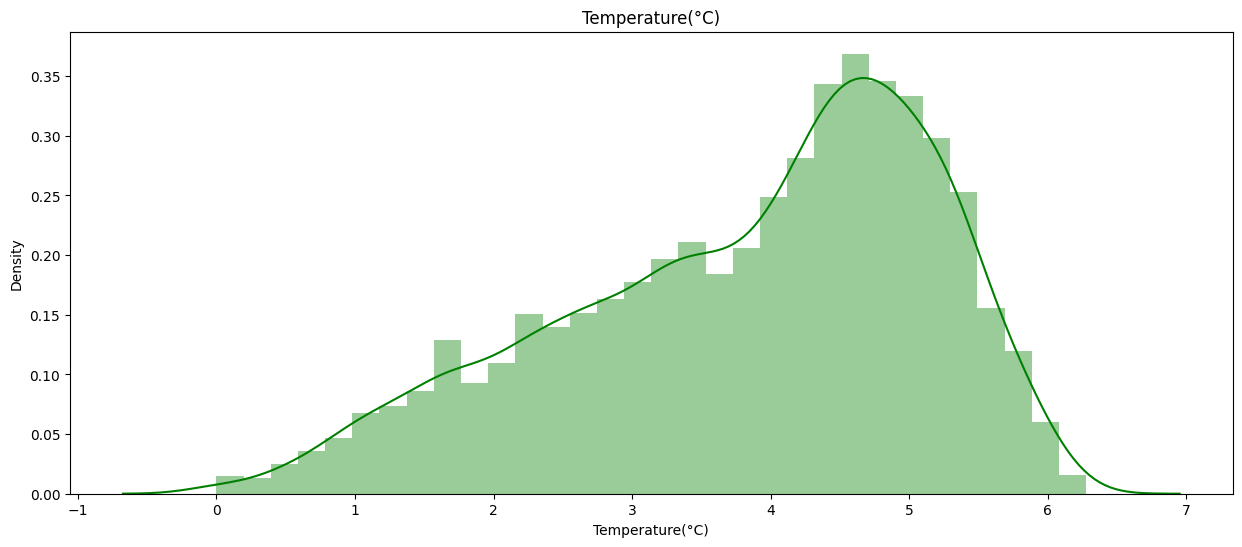

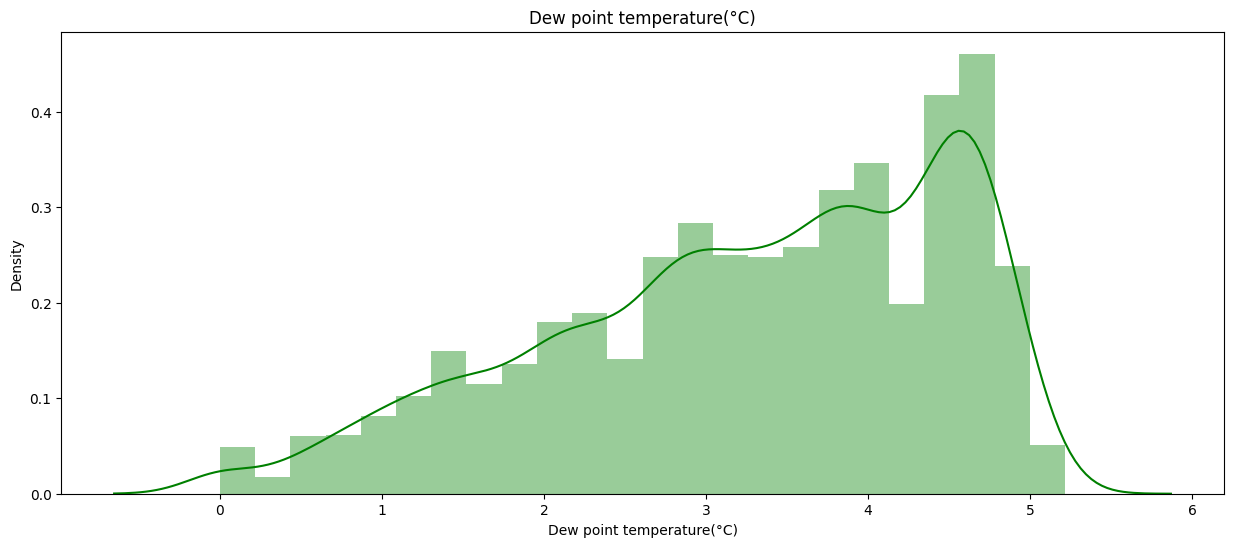

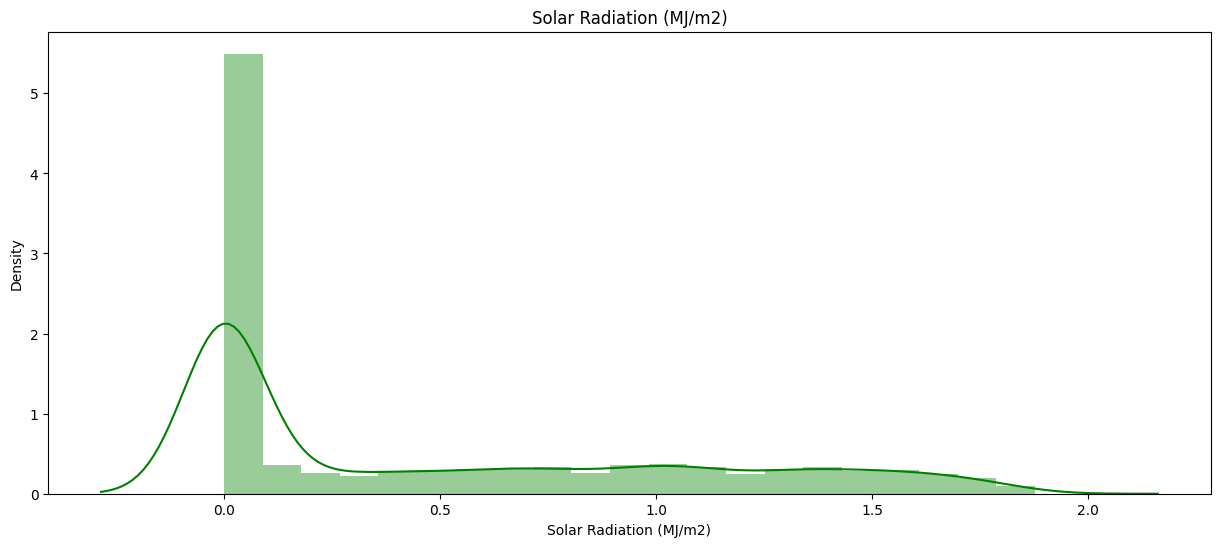

In [124]:
# visualization code with distplot after normalising.
for i in numerical_data:
  if i not in ['Rented Bike Count']:
    plt.figure(figsize=(15,6))
    plt.title(i)
    sns.distplot(np.sqrt(data[i]), color = 'g' )
    plt.show()

##### 1. Why did you pick the specific chart?

Distplot is one of the best charts to show the data distribution.

##### 2. What is/are the insight(s) found from the chart?

Distribution of Wind speed, Dew point temperature, Temperature and Humidity has improved.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Improved accuracy, comparability and better visualization are the result of normalization which can improve model performance.


#### Chart - 13
##Checking distribution of numerical data with mean and median after normalization.

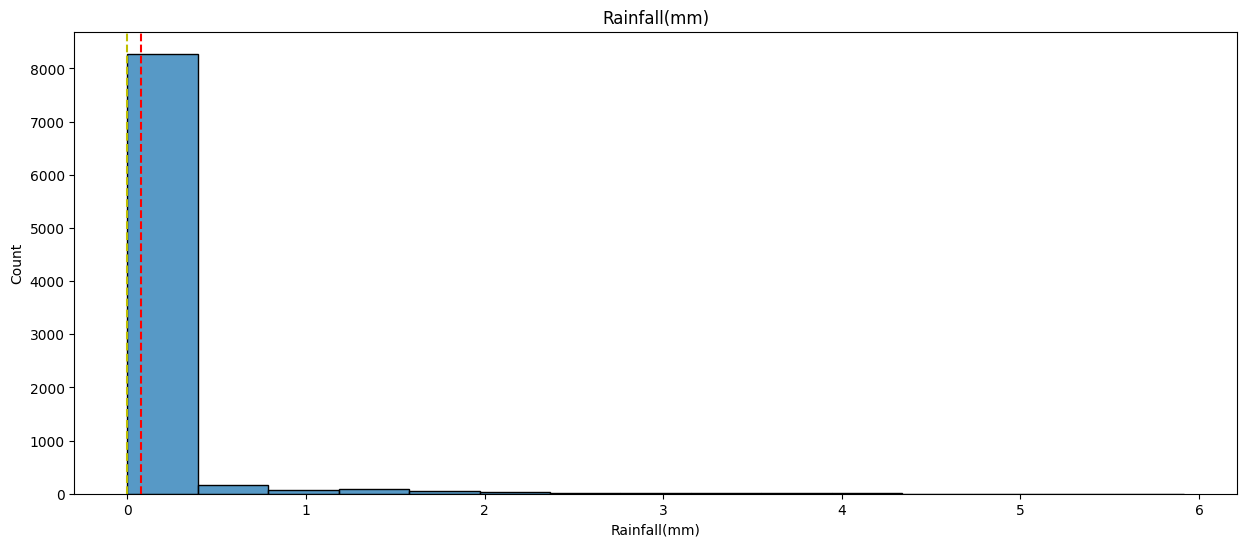

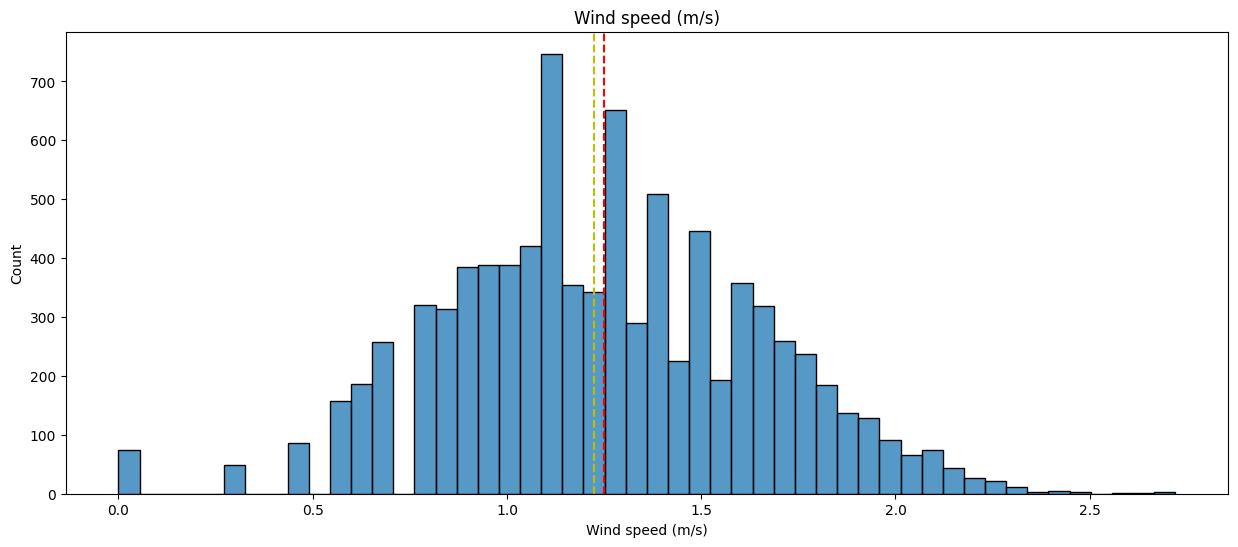

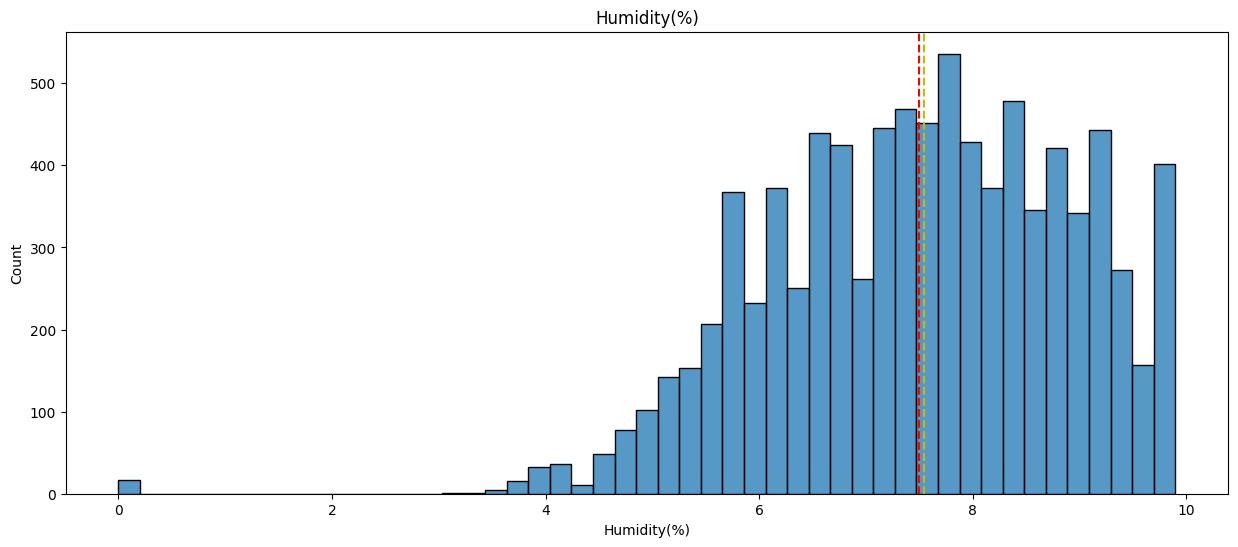

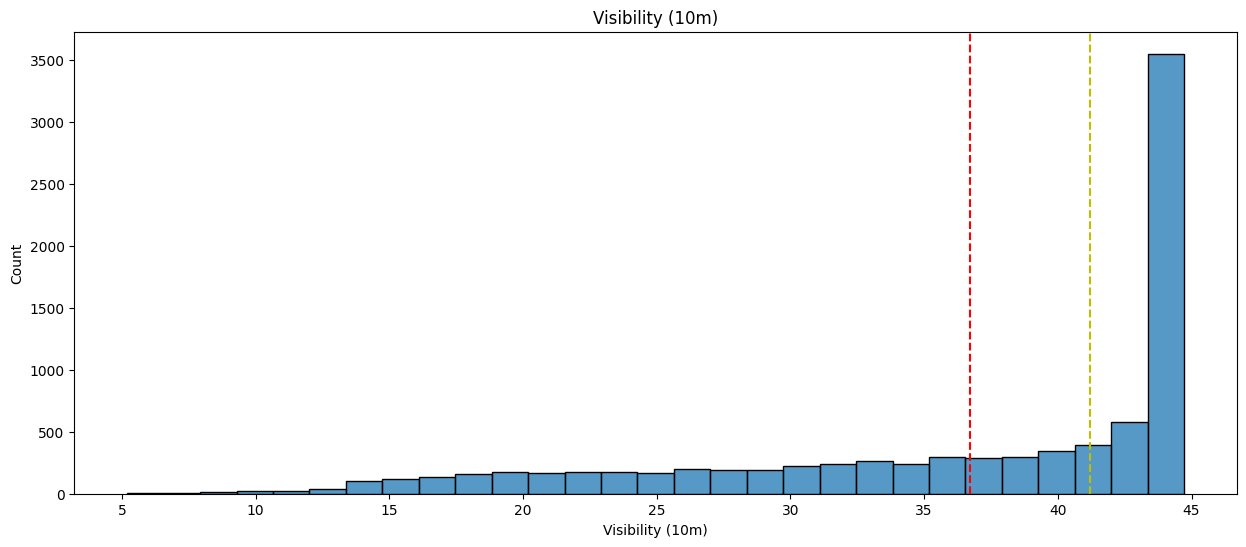

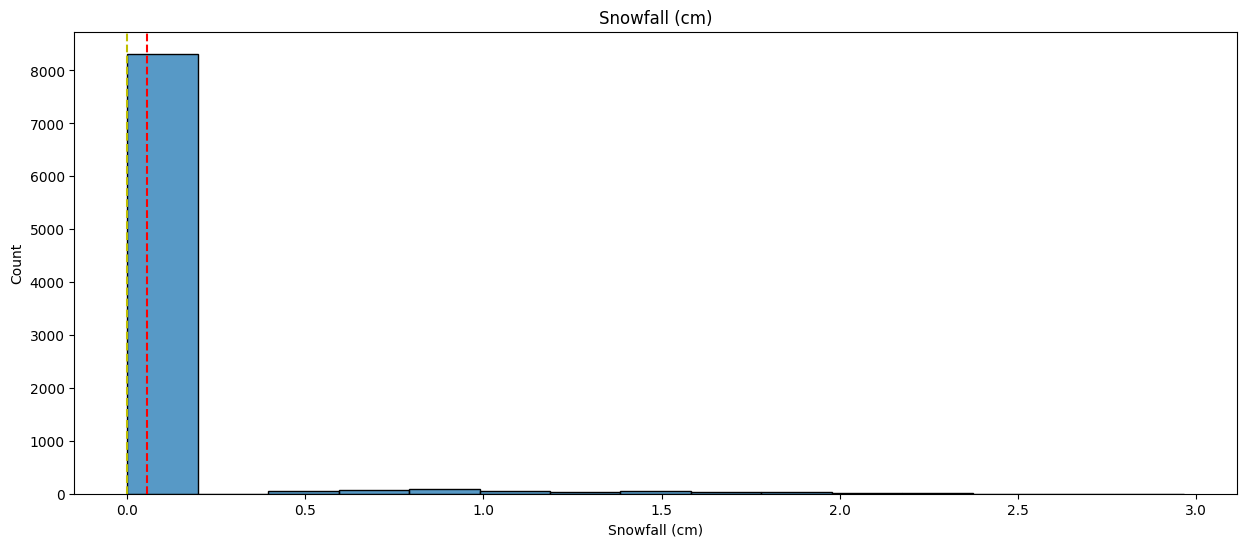

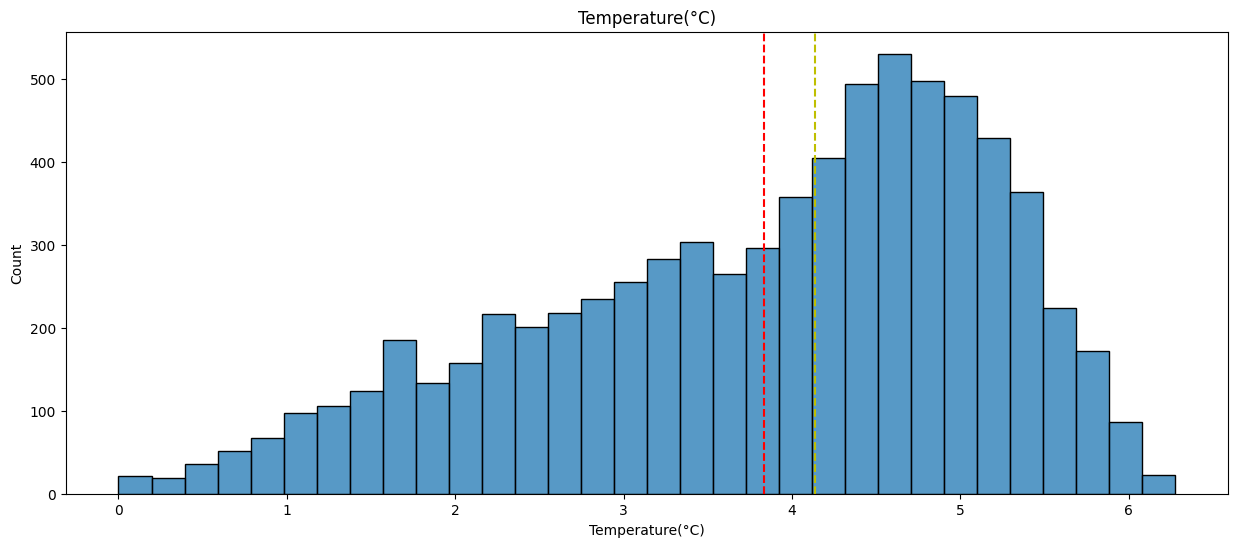

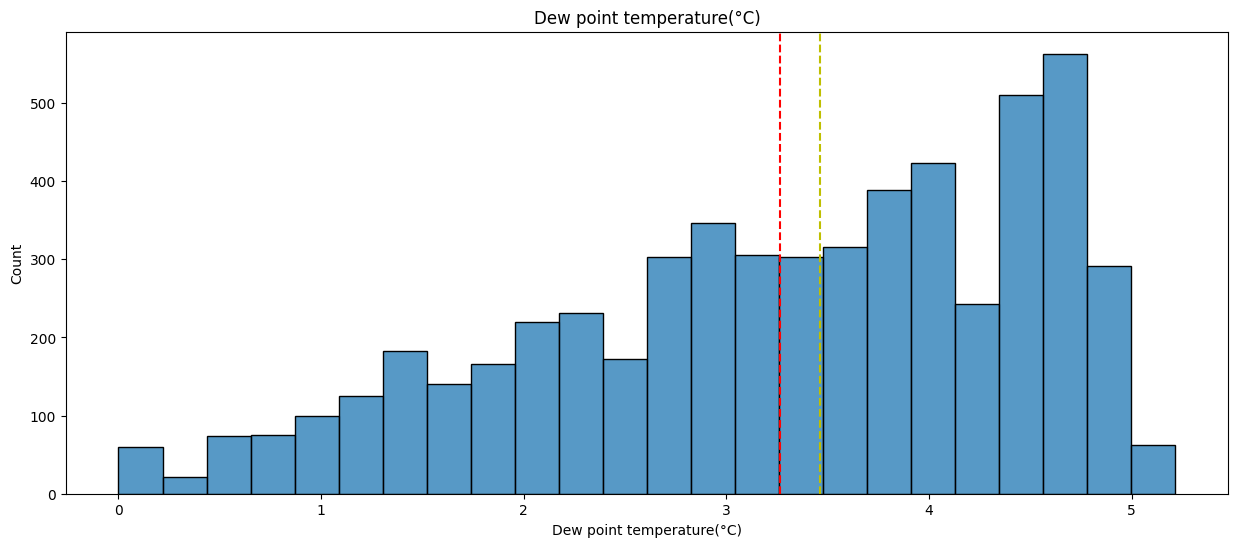

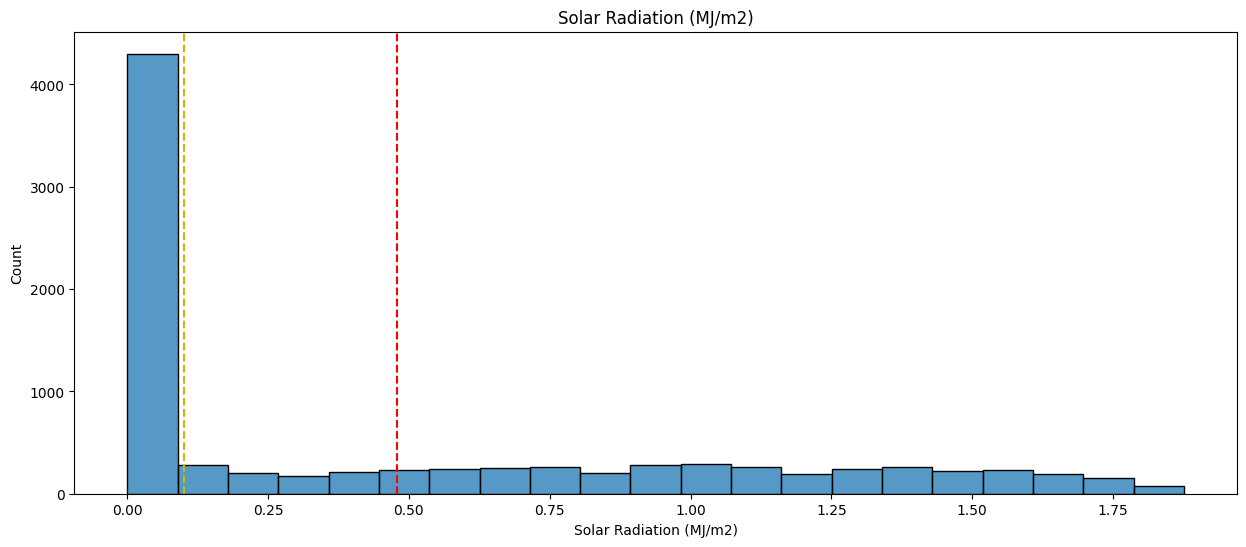

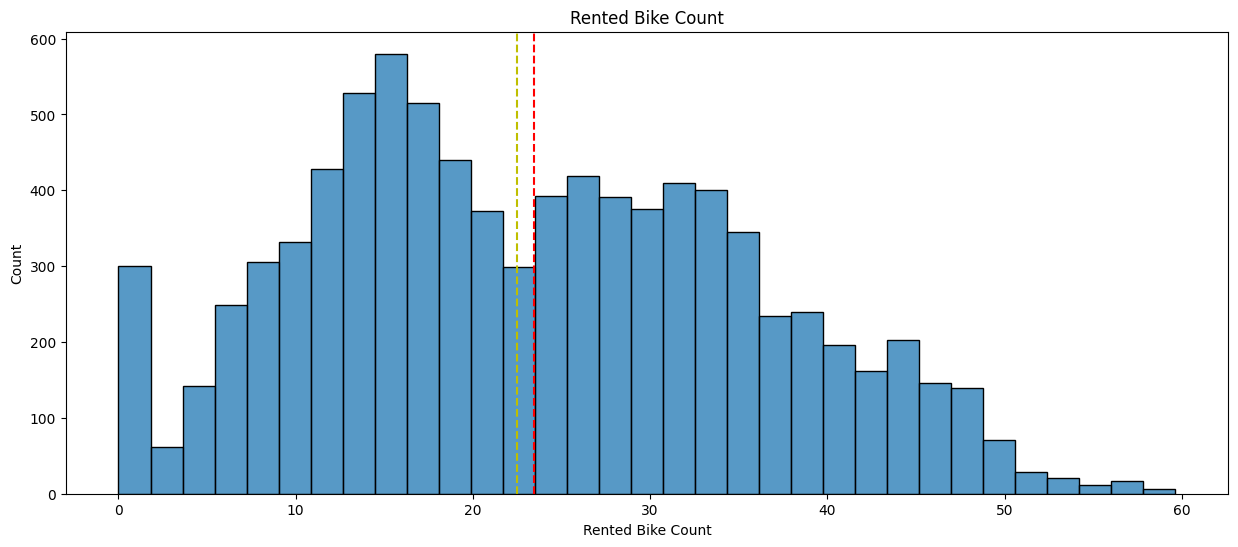

In [125]:
# Chart - 13 visualization code
# Visualizing the distribution of numerical data with mean and median using histplot.

for i in numerical_data:
  fig = plt.figure(figsize = (15,6))
  sns.histplot(np.sqrt(data[i]))
  plt.axvline(np.sqrt(data[i]).mean(), linestyle = '--', color = 'r')
  plt.axvline(np.sqrt(data[i]).median(), linestyle = '--', color = 'y')
  plt.title(i)
  plt.show()

##### 1. Why did you pick the specific chart?

Histplot is one of the best charts to show the data distribution.

##### 2. What is/are the insight(s) found from the chart?

Solar radiation, Snowfall, Rainfall and visibility are still skewed but Distribution of Wind speed, Dew point temperature, Temperature and Humidity has improved.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Improved accuracy, comparability and better visualization are the result of normalization which can improve model performance.

#### Chart - 14 - Correlation Heatmap
##Checking Corelation between dependent and independent variable using Correlation Heatmap visualization.

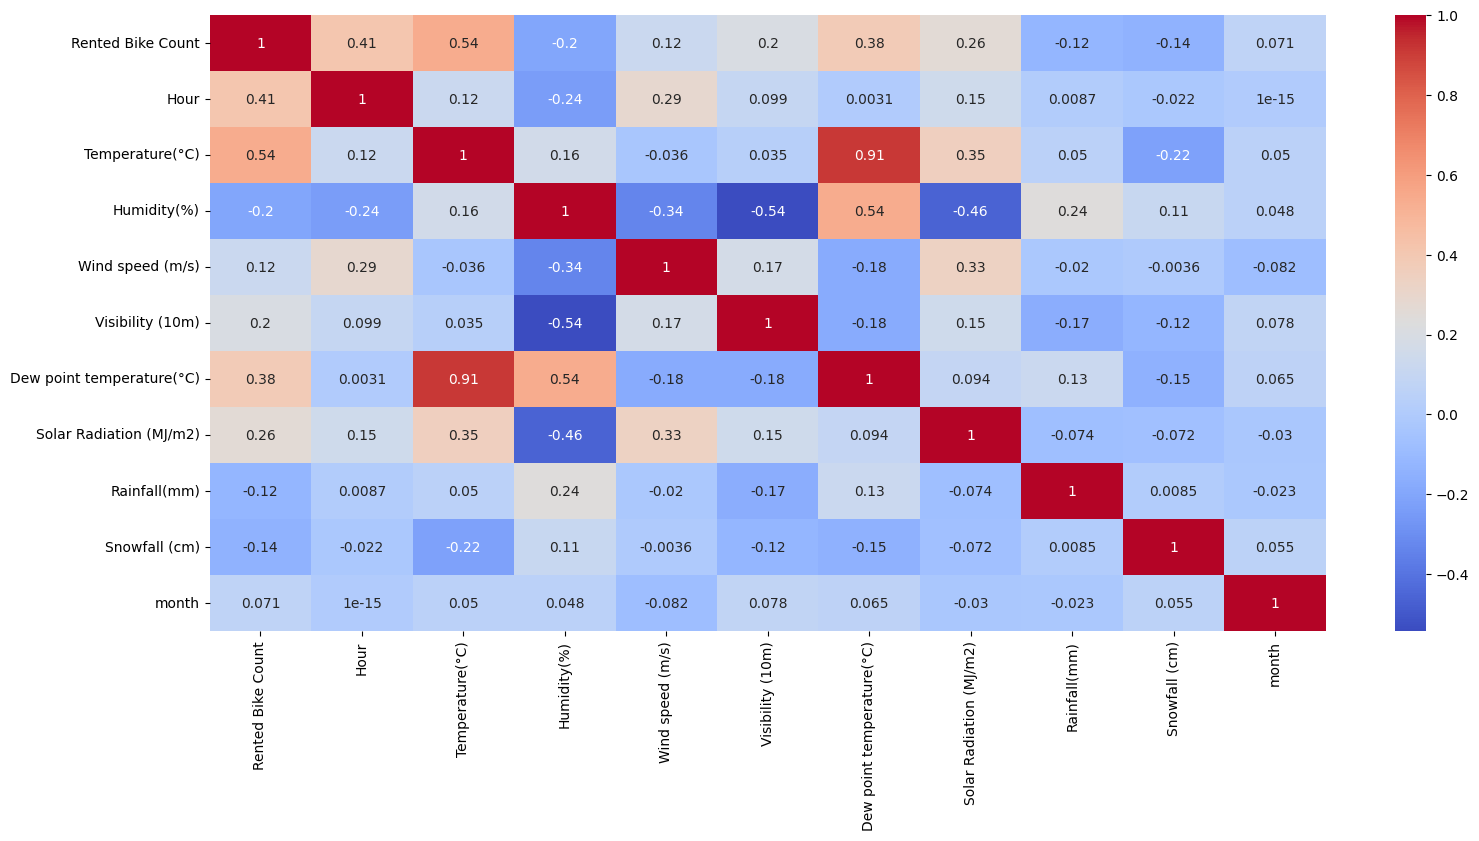

In [126]:
# Correlation Heatmap visualization code

corr = data.corr()

plt.figure(figsize = (18,8))
sns.heatmap(corr, annot = True , cmap = 'coolwarm')
plt.show()

##### 1. Why did you pick the specific chart?

the correlation between all the variables along with the correlation coeficients, i have used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

Temperature and Dew point Temperature are highly correlated.
As per our regression assumption, there should not be colinearity between independent variables.
We can see from the heatmap that "Temperature" and "Dew Point Temperature" are highly corelated. We can drop one of them.As the corelation between temperature and our dependent variable "Bike Rented Count" is high. So we will Keep the Temperature column and drop the "Dew Point Temperature" column.

#### Chart - 15 - Pair Plot

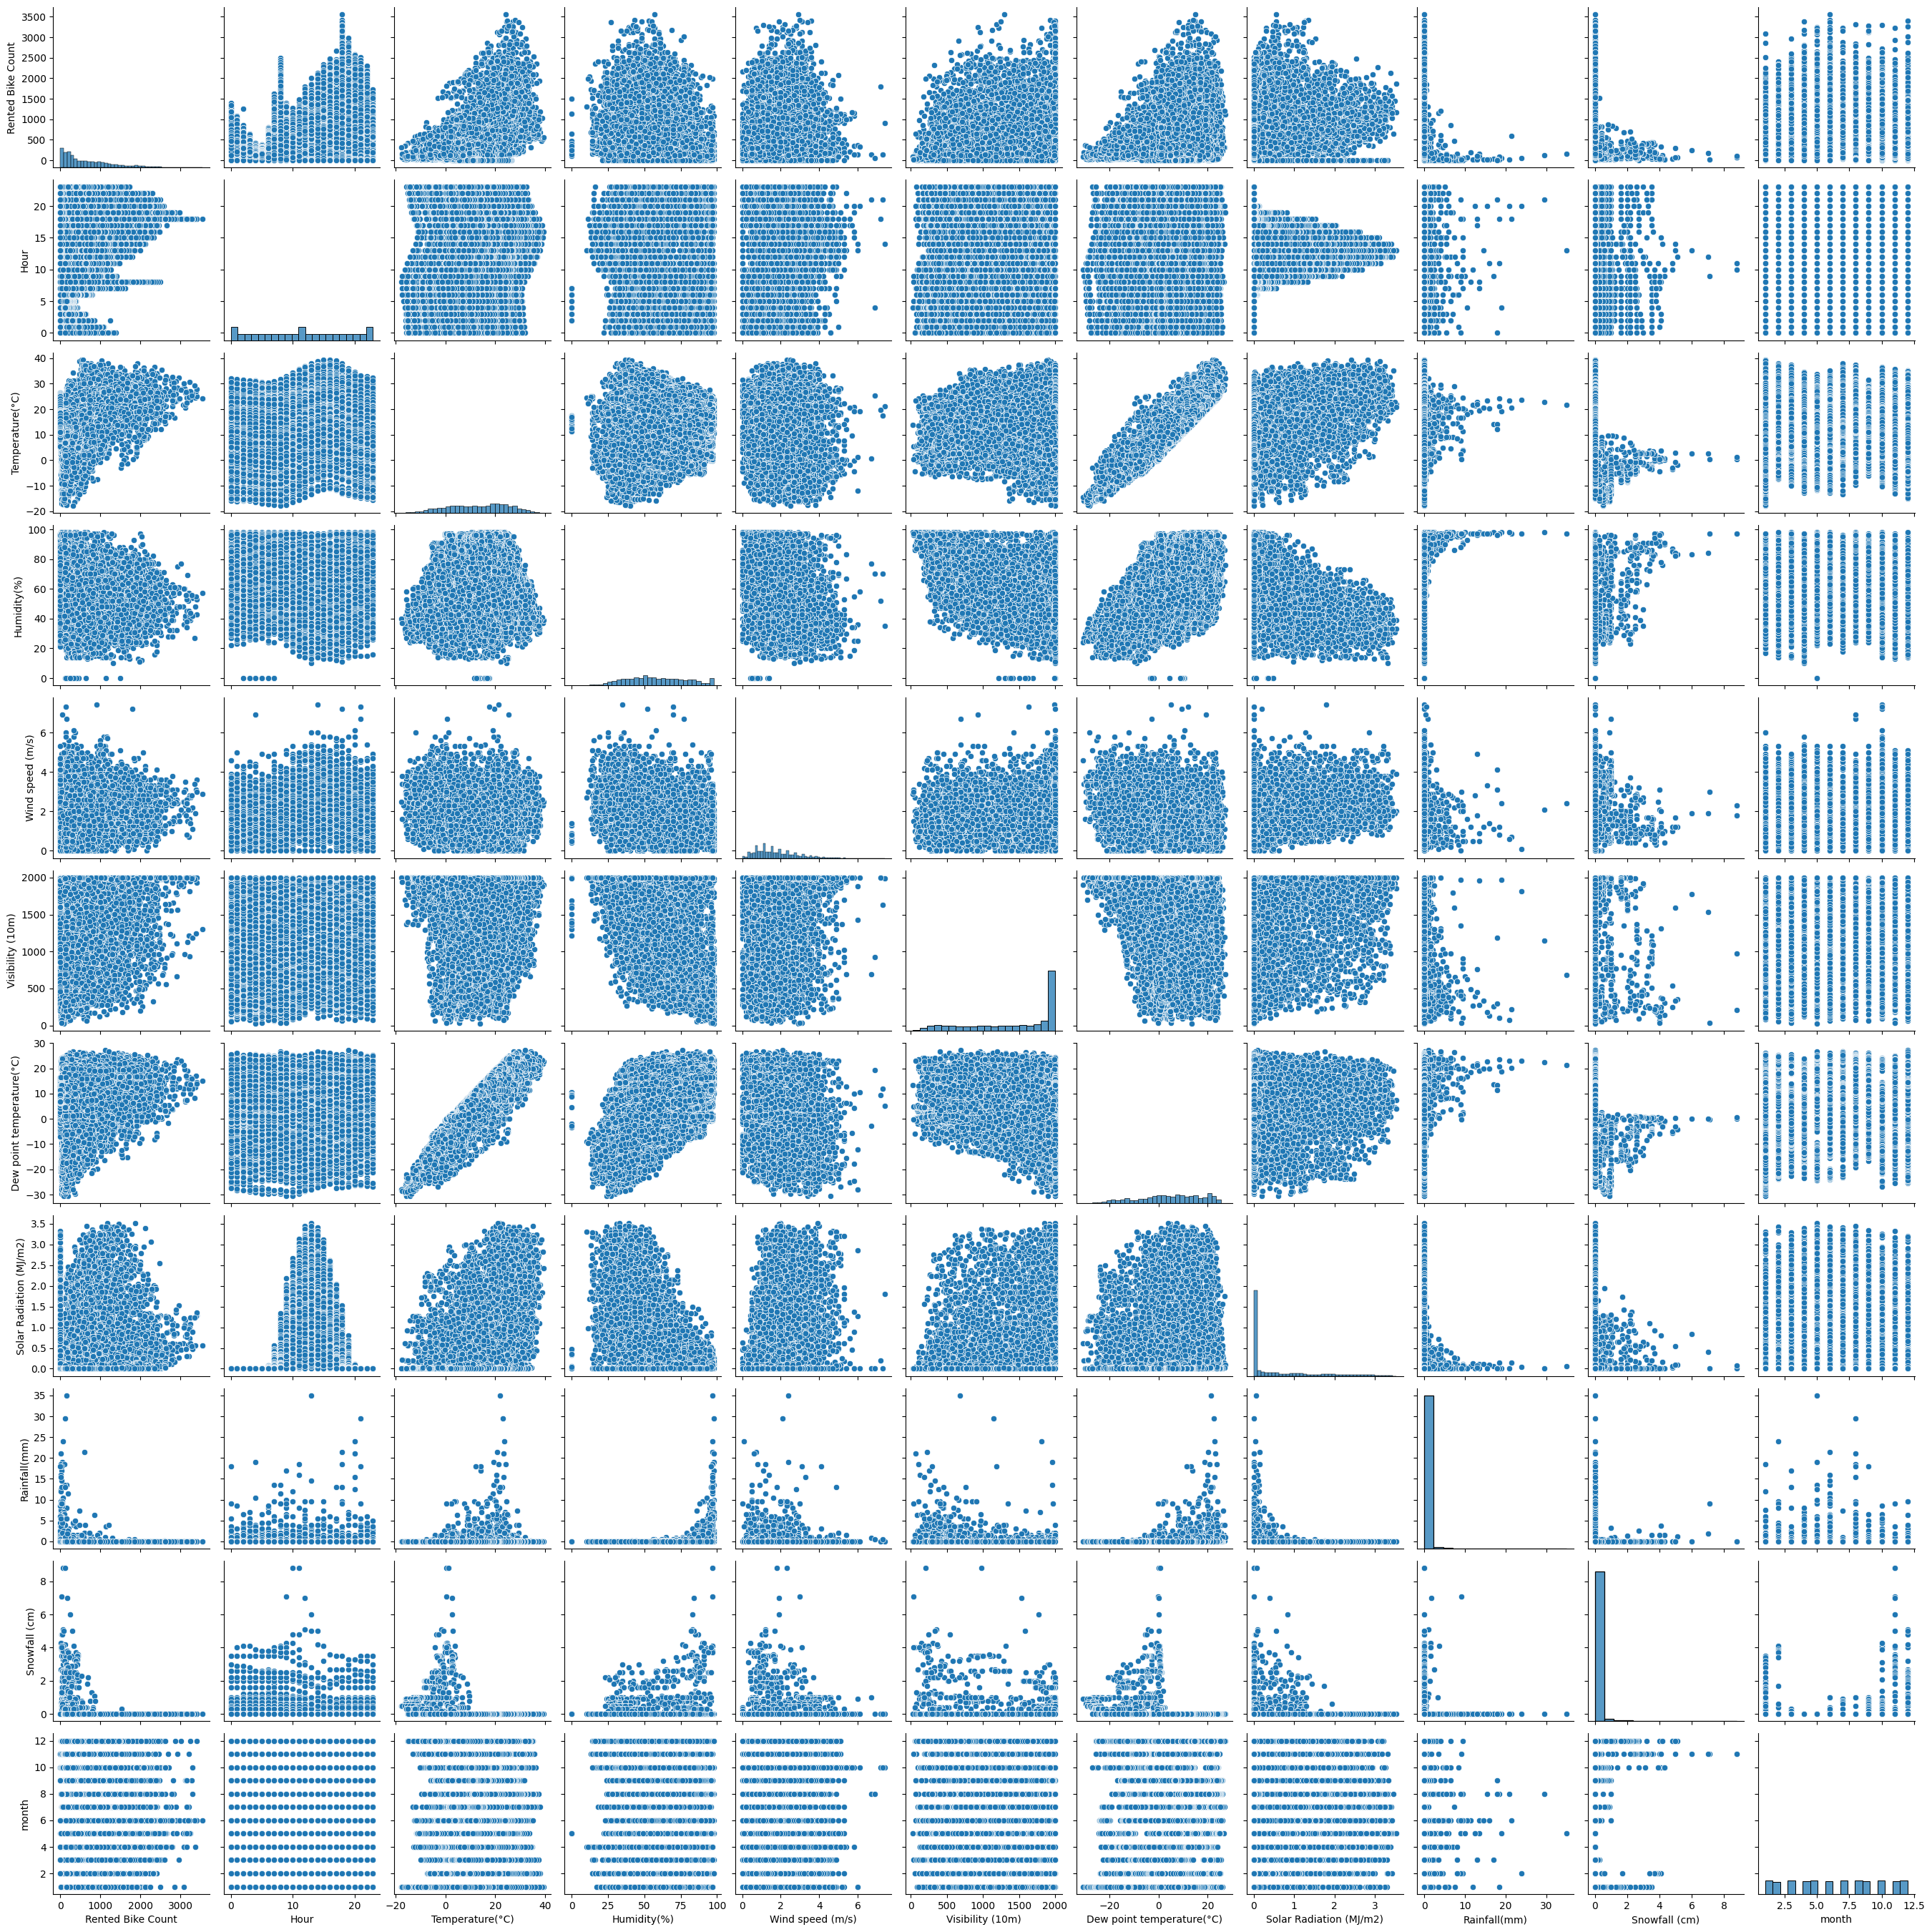

In [127]:
# Pair Plot visualization code
sns.pairplot(data = data)

##### 1. Why did you pick the specific chart?

used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

From above pair plot we got to know that, there is not clear linear relationship between variables. other than dew point temp, temperature & solar radiation there is not any reationship.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Based on above chart experiments we have noticed that our dependent variable does not seems to normally distributed so we have made hypothetical assumption that our data is normally distributed and for that we have decided to do statistical analysis.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

## Normality test

for normality test we decided
1. Null hypothesis : Data is normally distributed
2. Alternate hypothesis : Data is not normally distributed


#### 2. Perform an appropriate statistical test.

In [128]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import shapiro
test_data = data['Rented Bike Count']

stats,p  = shapiro(test_data)
print('stats = %.2f, p=%.3f' % (stats,p))

if p <= 0.05:
  print("Reject null hypothesis i.e  Data is not normally distributed")
else:
  print('Accept null hypothesis i.e  Data is normally distributed')

stats = 0.88, p=0.000
Reject null hypothesis i.e  Data is not normally distributed


##### Which statistical test have you done to obtain P-Value?

We use Shapiro-wilk statistical test to obtain the p-value and we got very less p-value which is less than 0.05.

##### Why did you choose the specific statistical test?

The Shapiro-Wilk test is used to test the normality of a sample. The test checks whether the sample data fits a normal distribution, which is often assumed for statistical analysis. The test results can help determine if the data should be transformed or if non-parametric statistical methods should be used instead of traditional parametric methods.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [129]:
# Handling Missing Values & Missing Value Imputation

# Checking if there is any null value in the dataset.

data.isnull().sum()

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
month                        0
day                          0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

***No missing/null values in the dataset.***

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [130]:
# Manipulating Features to minimize feature correlation and creating new features

# Defining a function for getting the variance inflation factor.

def Calculate_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [131]:
# Calculating VIF for variables.

Calculate_vif(data[[i for i in data.describe().columns if i not in ['Rented Bike Count']]])

# Not including 'Rented Bike Count' is the dependent variable.

variables        VIF
0                       Hour   4.424145
1            Temperature(°C)  34.053862
2                Humidity(%)   6.791640
3           Wind speed (m/s)   4.829379
4           Visibility (10m)   9.307161
5  Dew point temperature(°C)  17.547805
6    Solar Radiation (MJ/m2)   2.881761
7               Rainfall(mm)   1.082923
8              Snowfall (cm)   1.125240
9                      month   4.689821

In [132]:
#Not including 'Dew point temperature(°C)' as it has high VIF.

Calculate_vif(data[[i for i in data.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)']]])

variables       VIF
0                     Hour  3.956097
1          Temperature(°C)  3.230202
2              Humidity(%)  6.006861
3         Wind speed (m/s)  4.615739
4         Visibility (10m)  5.332471
5  Solar Radiation (MJ/m2)  2.265399
6             Rainfall(mm)  1.081093
7            Snowfall (cm)  1.124563
8                    month  4.577143

In [133]:
#Not including 'Humidity(%)' as it has high VIF.

Calculate_vif(data[[i for i in data.describe().columns if i not in ['Rented_Bike_Count','Dew point temperature(°C)','Humidity(%)']]])

variables       VIF
0        Rented Bike Count  3.921873
1                     Hour  4.546946
2          Temperature(°C)  3.381802
3         Wind speed (m/s)  4.300317
4         Visibility (10m)  5.287887
5  Solar Radiation (MJ/m2)  1.895277
6             Rainfall(mm)  1.080797
7            Snowfall (cm)  1.082468
8                    month  3.710027

In [134]:
#Not including 'Visibility (10m)' as it has high VIF.

Calculate_vif(data[[i for i in data.describe().columns if i not in ['Rented_Bike_Count','Dew point temperature(°C)','Humidity(%)','Visibility (10m)']]])

variables       VIF
0        Rented Bike Count  3.883992
1                     Hour  4.420101
2          Temperature(°C)  3.361637
3         Wind speed (m/s)  3.729333
4  Solar Radiation (MJ/m2)  1.894759
5             Rainfall(mm)  1.070620
6            Snowfall (cm)  1.079310
7                    month  2.967952

## Now we have VIF values in the range of 1 to 5. we will drop 'Humidity', 'Dew point temperature(°C)', 'Visibility' because these columns from our dataset  shown colinearity in VIF test.

#### 2. Feature Selection

In [135]:
# Selecting the features which are not colinear among themselves and whose VIF is less than 5.

features = list(set(data.describe().columns) - set(['Rented_Bike_Count','Dew point temperature(°C)','Humidity(%)','Visibility (10m)']))
features

['Rainfall(mm)',
 'Wind speed (m/s)',
 'Hour',
 'Solar Radiation (MJ/m2)',
 'Snowfall (cm)',
 'Temperature(°C)',
 'month',
 'Rented Bike Count']

##### What all feature selection methods have you used  and why?

Used VIF(Variance Inflation Factor). It is a measure of multicollinearity in regression analysis that quantifies how much the variance of the estimated regression coefficients are increased due to the linear dependence between the predictor variables.

And along with that we did manual feature elimination using VIF.

##### Which all features you found important and why?

I have selected these features as they show least amount of multicolinearity -

['Snowfall (cm)',
 'Wind speed (m/s)',
 'Solar Radiation (MJ/m2)',
 'Rented Bike Count',
 'Temperature(°C)',
 'Hour',
 'Rainfall(mm)',
 'month']  

### 2. Categorical Encoding

In [157]:
# Encode your categorical columns

# Converting snowfall and rainfall to categorical attributes
data['Snowfall (cm)'] = data['Snowfall (cm)'].apply(lambda x: 1 if x>0 else 0)
data['Rainfall(mm)'] = data['Rainfall(mm)'].apply(lambda x: 1 if x>0 else 0)

# encoding the visibility column
data['Visibility (10m)'] = data['Visibility (10m)'].apply(lambda x: 0 if 0<=x<=399 else (1 if 400<=x<=999 else 2))

# encoding
data['Functioning Day'] = np.where(data['Functioning Day'] == 'Yes',1,0)
data['Holiday'] = np.where(data['Holiday'] == 'Holiday', 1,0)

# one hot encoding
data = pd.get_dummies(data, columns = ['Hour', 'Visibility (10m)', 'month', 'day' ,'Seasons'])

KeyError: ignored

In [137]:
print(data.columns)
print(data.shape)

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Hour_0', 'Hour_1', 'Hour_2', 'Hour_3',
       'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10',
       'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16',
       'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22',
       'Hour_23', 'Visibility (10m)_0', 'Visibility (10m)_1',
       'Visibility (10m)_2', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12', 'day_Friday', 'day_Monday', 'day_Saturday',
       'day_Sunday', 'day_Thursday', 'day_Tuesday', 'day_Wednesday'],
      dtype='object')
(8760, 57)


#### What all categorical encoding techniques have you used & why did you use those techniques?

I used manual categorical encoding and One hot encoding which is a technique used in data preprocessing and feature engineering to represent categorical variables as numerical features that can be used as inputs to machine learning models.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

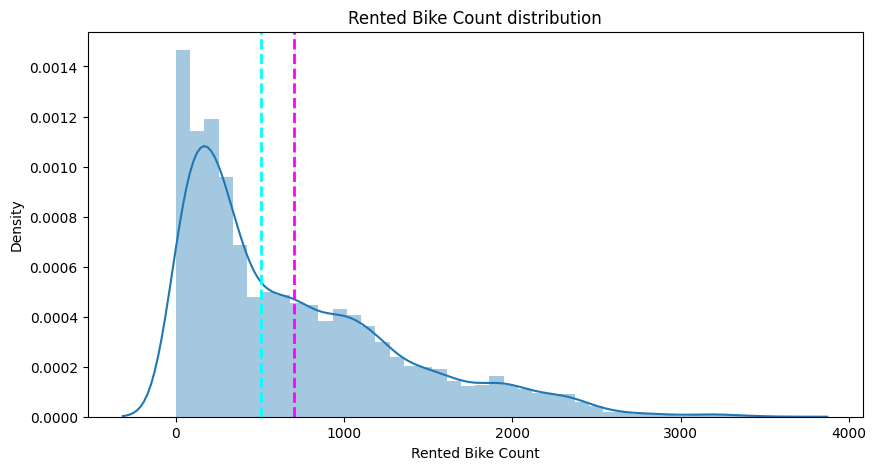

In [138]:
# Transform Your data
# visualizing the distribution of the dependent variable - rental bike count
dependent_variable=['Rented Bike Count']
plt.figure(figsize=(10,5))
sns.distplot(data[dependent_variable])
plt.xlabel(dependent_variable[0])
plt.title(dependent_variable[0]+' distribution')
plt.axvline(data[dependent_variable[0]].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(data[dependent_variable[0]].median(), color='cyan', linestyle='dashed', linewidth=2)

In [139]:
# skew of the dependent variable
data[dependent_variable].skew()

Rented Bike Count    1.153428
dtype: float64

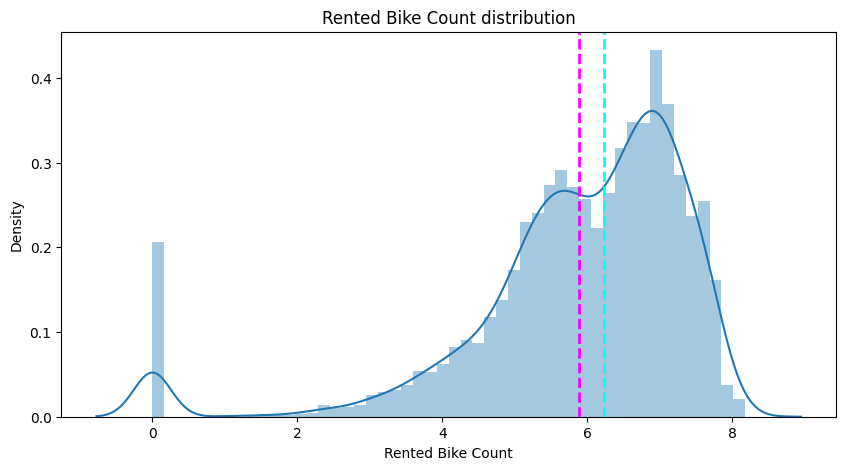

In [141]:
# visualizing the distribution of dependent variable after log transformation
plt.figure(figsize=(10,5))
sns.distplot(np.log1p(data[dependent_variable]))
plt.xlabel(dependent_variable[0])
plt.title(dependent_variable[0]+' distribution')
plt.axvline(np.log1p(data['Rented Bike Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(np.log1p(data['Rented Bike Count']).median(), color='cyan', linestyle='dashed', linewidth=2)

In [142]:
# skew of the dependent variable after log transformation
np.log1p(data[dependent_variable]).skew()

Rented Bike Count   -1.832199
dtype: float64

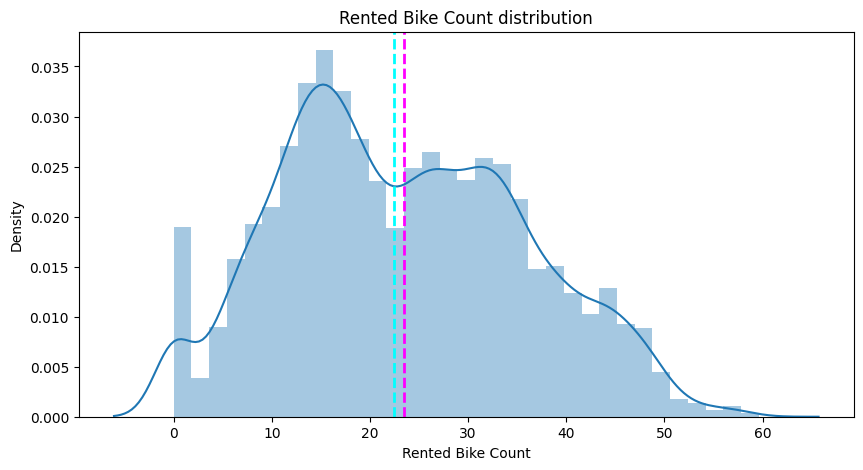

In [143]:
# visualizing the distribution of dependent variable after sqrt transformation
plt.figure(figsize=(10,5))
sns.distplot(np.sqrt(data[dependent_variable]))
plt.xlabel(dependent_variable[0])
plt.title(dependent_variable[0]+' distribution')
plt.axvline(np.sqrt(data['Rented Bike Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(np.sqrt(data['Rented Bike Count']).median(), color='cyan', linestyle='dashed', linewidth=2)

In [144]:
# # skew of the dependent variable after sqrt transformation
np.sqrt(data[dependent_variable]).skew()

Rented Bike Count    0.237362
dtype: float64

In [146]:
# Defining dependent and independent variables
X = data.drop('Rented Bike Count',axis=1)
y = np.sqrt(data[dependent_variable])

In [148]:
X.head()

Temperature(°C)  Humidity(%)  Wind speed (m/s)  Dew point temperature(°C)  \
0             -5.2           37               2.2                      -17.6   
1             -5.5           38               0.8                      -17.6   
2             -6.0           39               1.0                      -17.7   
3             -6.2           40               0.9                      -17.6   
4             -6.0           36               2.3                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  Holiday  \
0                      0.0             0              0  Winter        0   
1                      0.0             0              0  Winter        0   
2                      0.0             0              0  Winter        0   
3                      0.0             0              0  Winter        0   
4                      0.0             0              0  Winter        0   

   Functioning Day  ...  month_10  month_11  month_12  day_Friday  day_Monday  \
0                1  ...         0         0         0           0           0   
1                1  ...         0         0         0           0           0   
2                1  ...         0         0         0           0           0   
3                1  ...         0         0         0           0           0   
4                1  ...         0         0         0           0           0   

   day_Saturday  day_Sunday  day_Thursday  day_Tuesday  day_Wednesday  
0             0           0             1            0              0  
1             0           0             1            0              0  
2             0           0             1            0              0  
3             0           0             1            0              0  
4             0           0             1            0              0  

[5 rows x 56 columns]

In [152]:
features = [i for i in data.columns if i not in ['Rented Bike Count']]
features

['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day',
 'Hour_0',
 'Hour_1',
 'Hour_2',
 'Hour_3',
 'Hour_4',
 'Hour_5',
 'Hour_6',
 'Hour_7',
 'Hour_8',
 'Hour_9',
 'Hour_10',
 'Hour_11',
 'Hour_12',
 'Hour_13',
 'Hour_14',
 'Hour_15',
 'Hour_16',
 'Hour_17',
 'Hour_18',
 'Hour_19',
 'Hour_20',
 'Hour_21',
 'Hour_22',
 'Hour_23',
 'Visibility (10m)_0',
 'Visibility (10m)_1',
 'Visibility (10m)_2',
 'month_1',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_6',
 'month_7',
 'month_8',
 'month_9',
 'month_10',
 'month_11',
 'month_12',
 'day_Friday',
 'day_Monday',
 'day_Saturday',
 'day_Sunday',
 'day_Thursday',
 'day_Tuesday',
 'day_Wednesday']

###  We plot distribution plot and also we did normality test using shapiro wilk and we have found that our data is not normally distributed it needs transformation.

So, first we have calculate the skewness value and we have found that rented bike attribute is positively skewed so we used log transfomation but it affected negatively

So, we finally used square root transformation & now our data looks normally distrubuted & skewness is also reduced.

### 6. Data Scaling

In [156]:
# Scaling your data
scaler = StandardScaler()
X = scaler.fit_transform(data[features])

ValueError: ignored

In [155]:
features

['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day',
 'Hour_0',
 'Hour_1',
 'Hour_2',
 'Hour_3',
 'Hour_4',
 'Hour_5',
 'Hour_6',
 'Hour_7',
 'Hour_8',
 'Hour_9',
 'Hour_10',
 'Hour_11',
 'Hour_12',
 'Hour_13',
 'Hour_14',
 'Hour_15',
 'Hour_16',
 'Hour_17',
 'Hour_18',
 'Hour_19',
 'Hour_20',
 'Hour_21',
 'Hour_22',
 'Hour_23',
 'Visibility (10m)_0',
 'Visibility (10m)_1',
 'Visibility (10m)_2',
 'month_1',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_6',
 'month_7',
 'month_8',
 'month_9',
 'month_10',
 'month_11',
 'month_12',
 'day_Friday',
 'day_Monday',
 'day_Saturday',
 'day_Sunday',
 'day_Thursday',
 'day_Tuesday',
 'day_Wednesday']

##### Which method have you used to scale you data and why?

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [65]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [66]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [67]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [68]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [69]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [70]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [71]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [72]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [73]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [74]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***